In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)


        
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


2022-08-05 15:56:47.419181: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


100%|██████████| 19/19 [07:42<00:00, 24.35s/it]


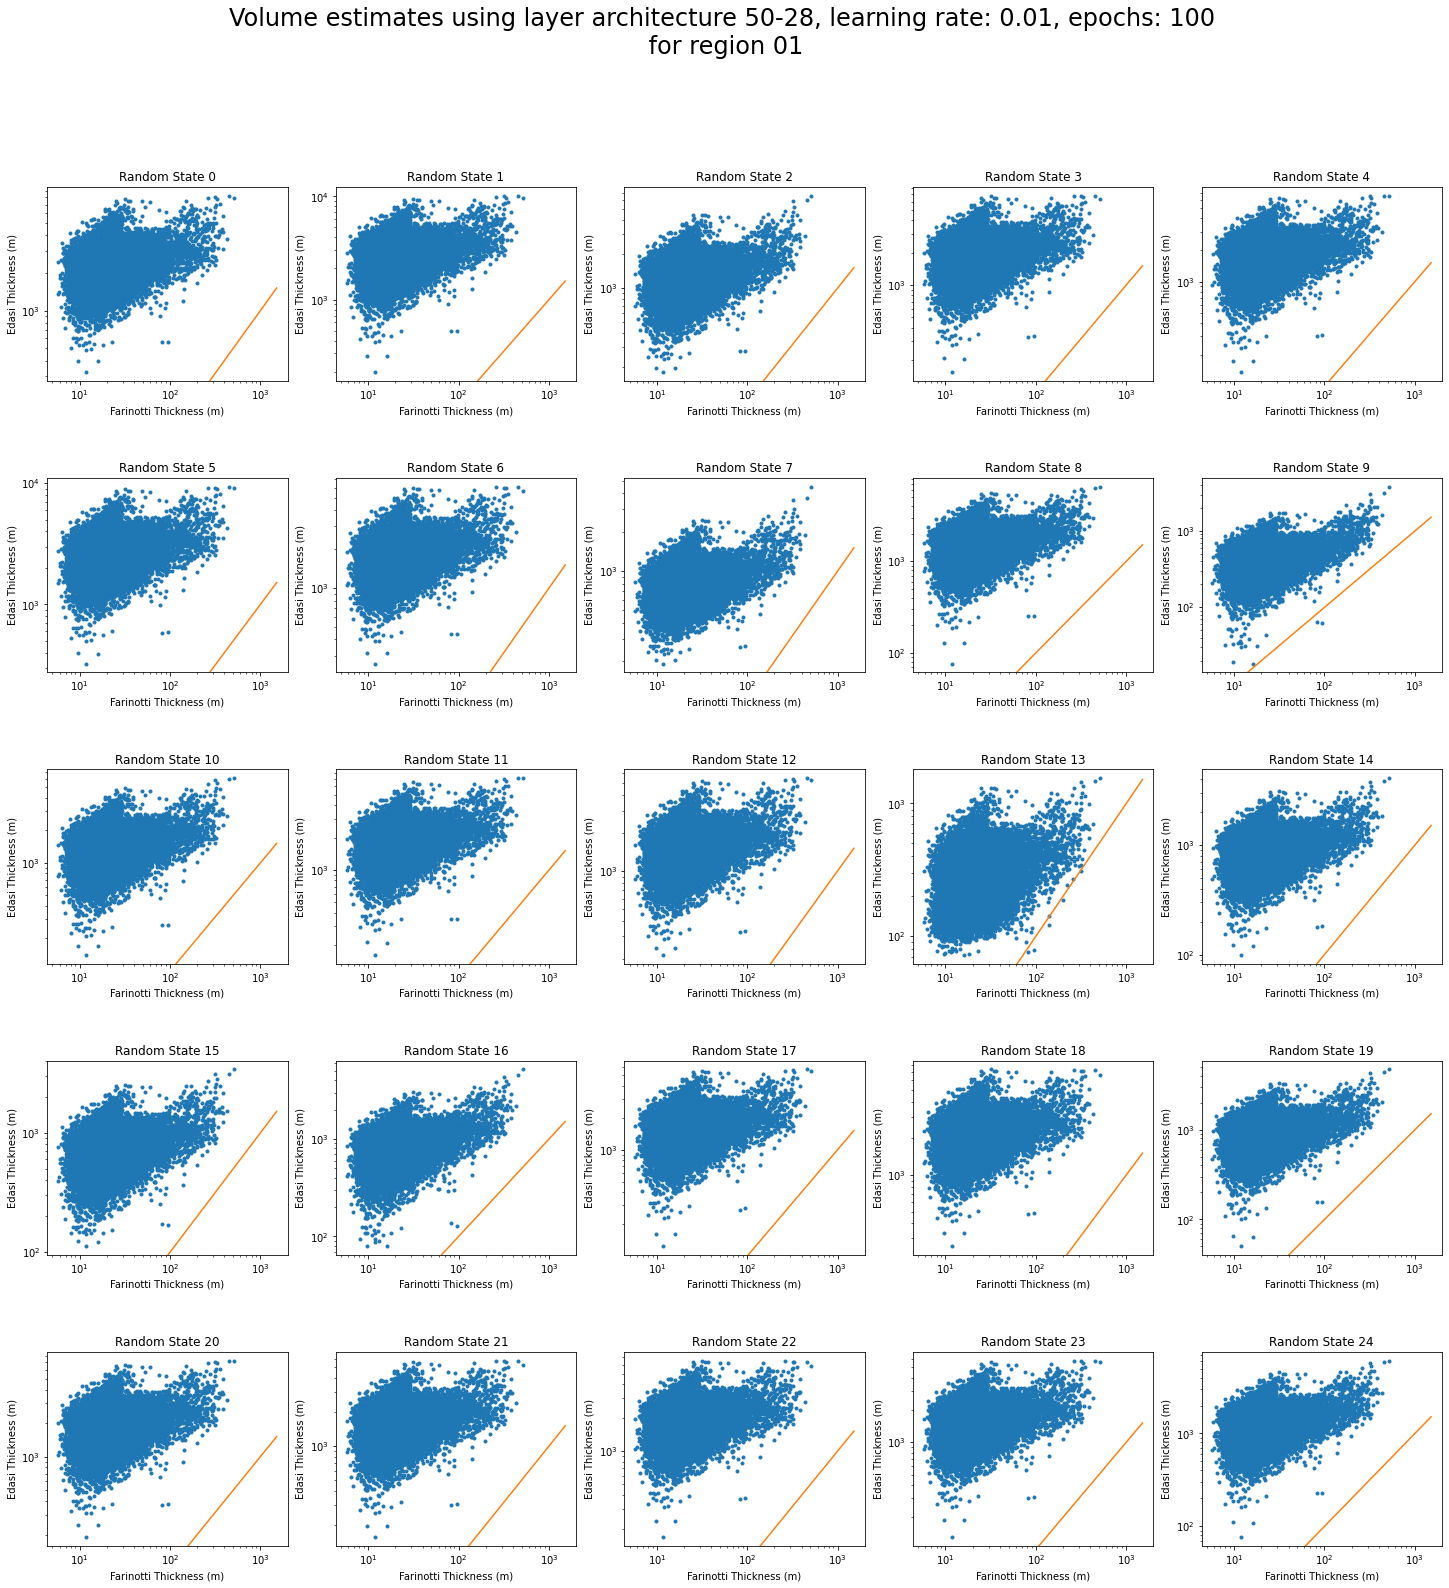

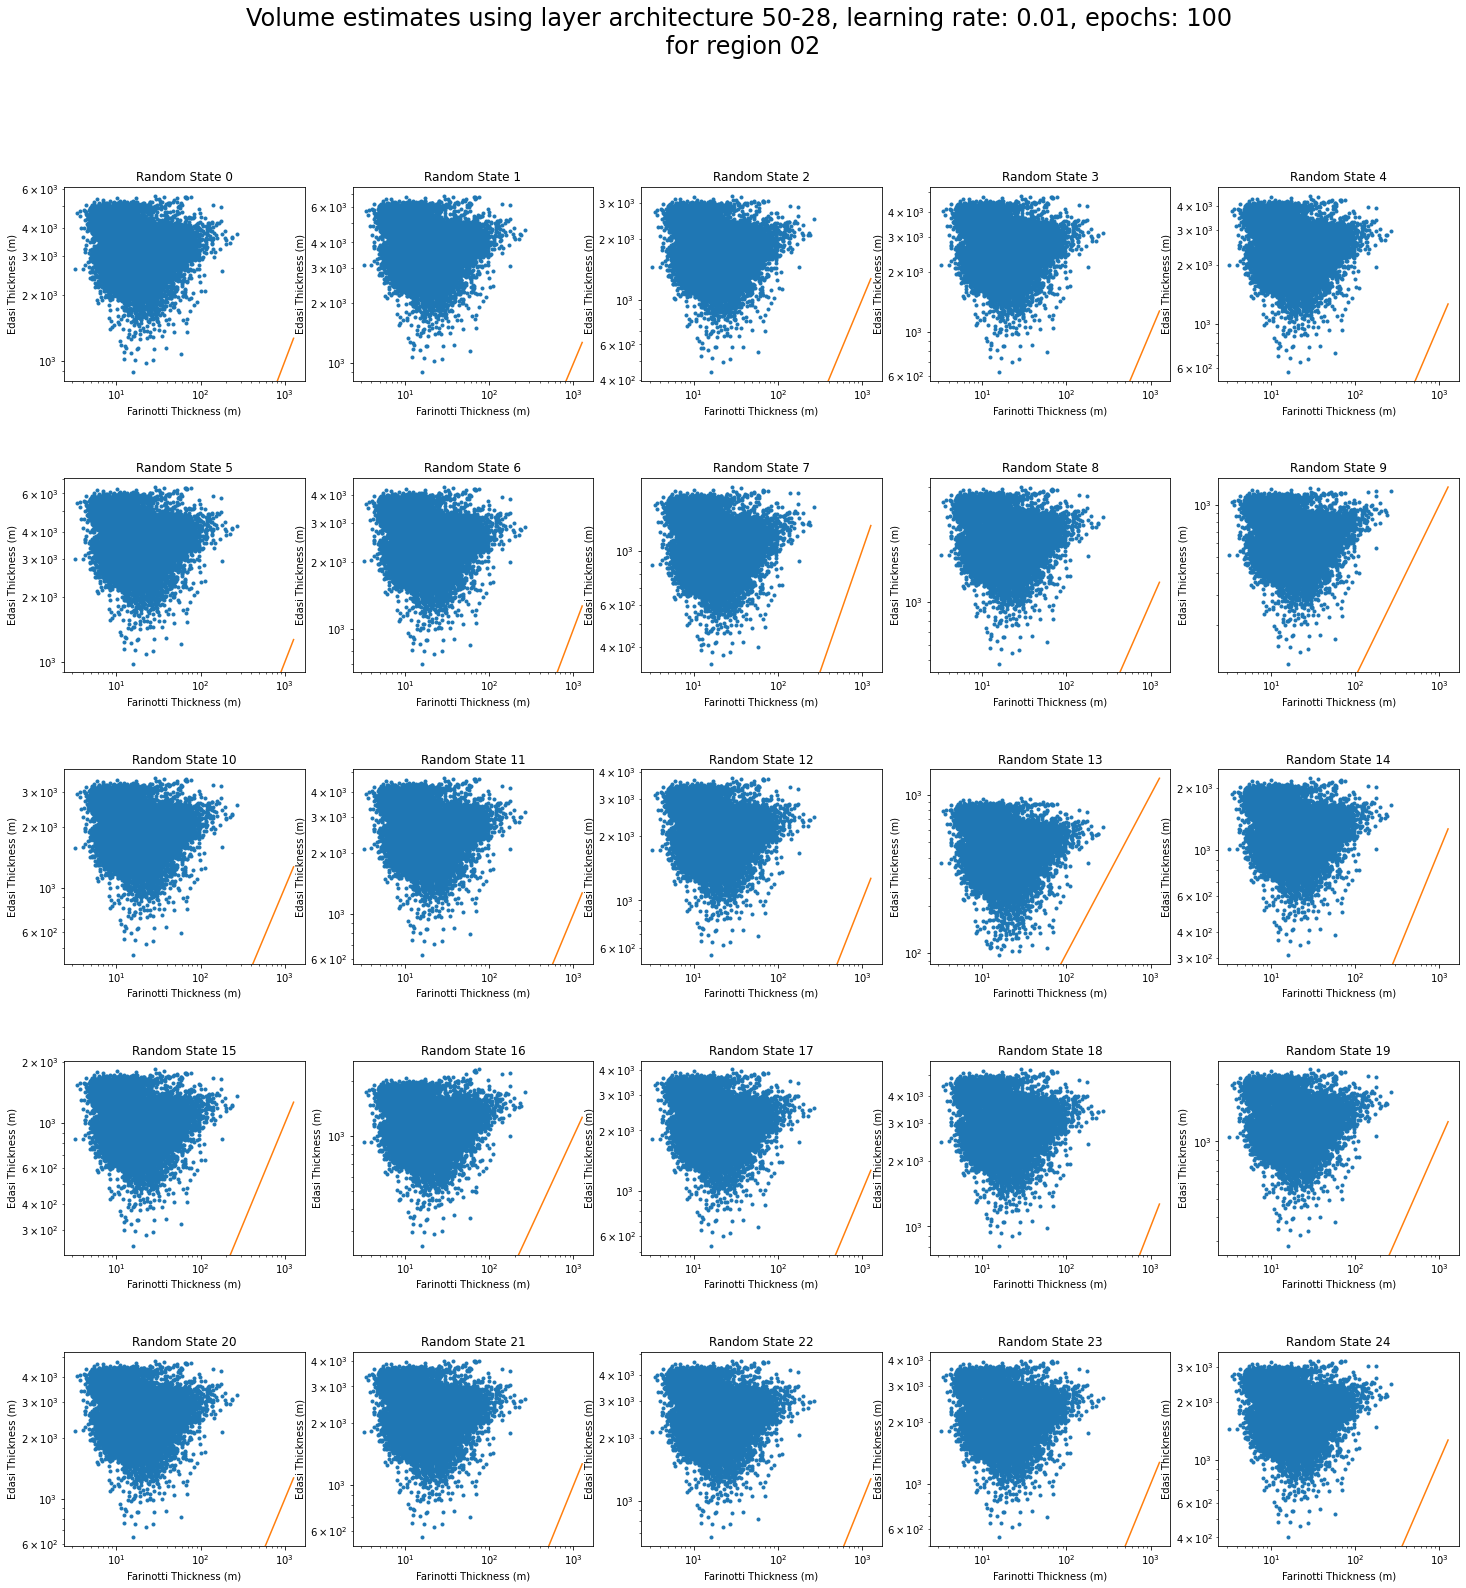

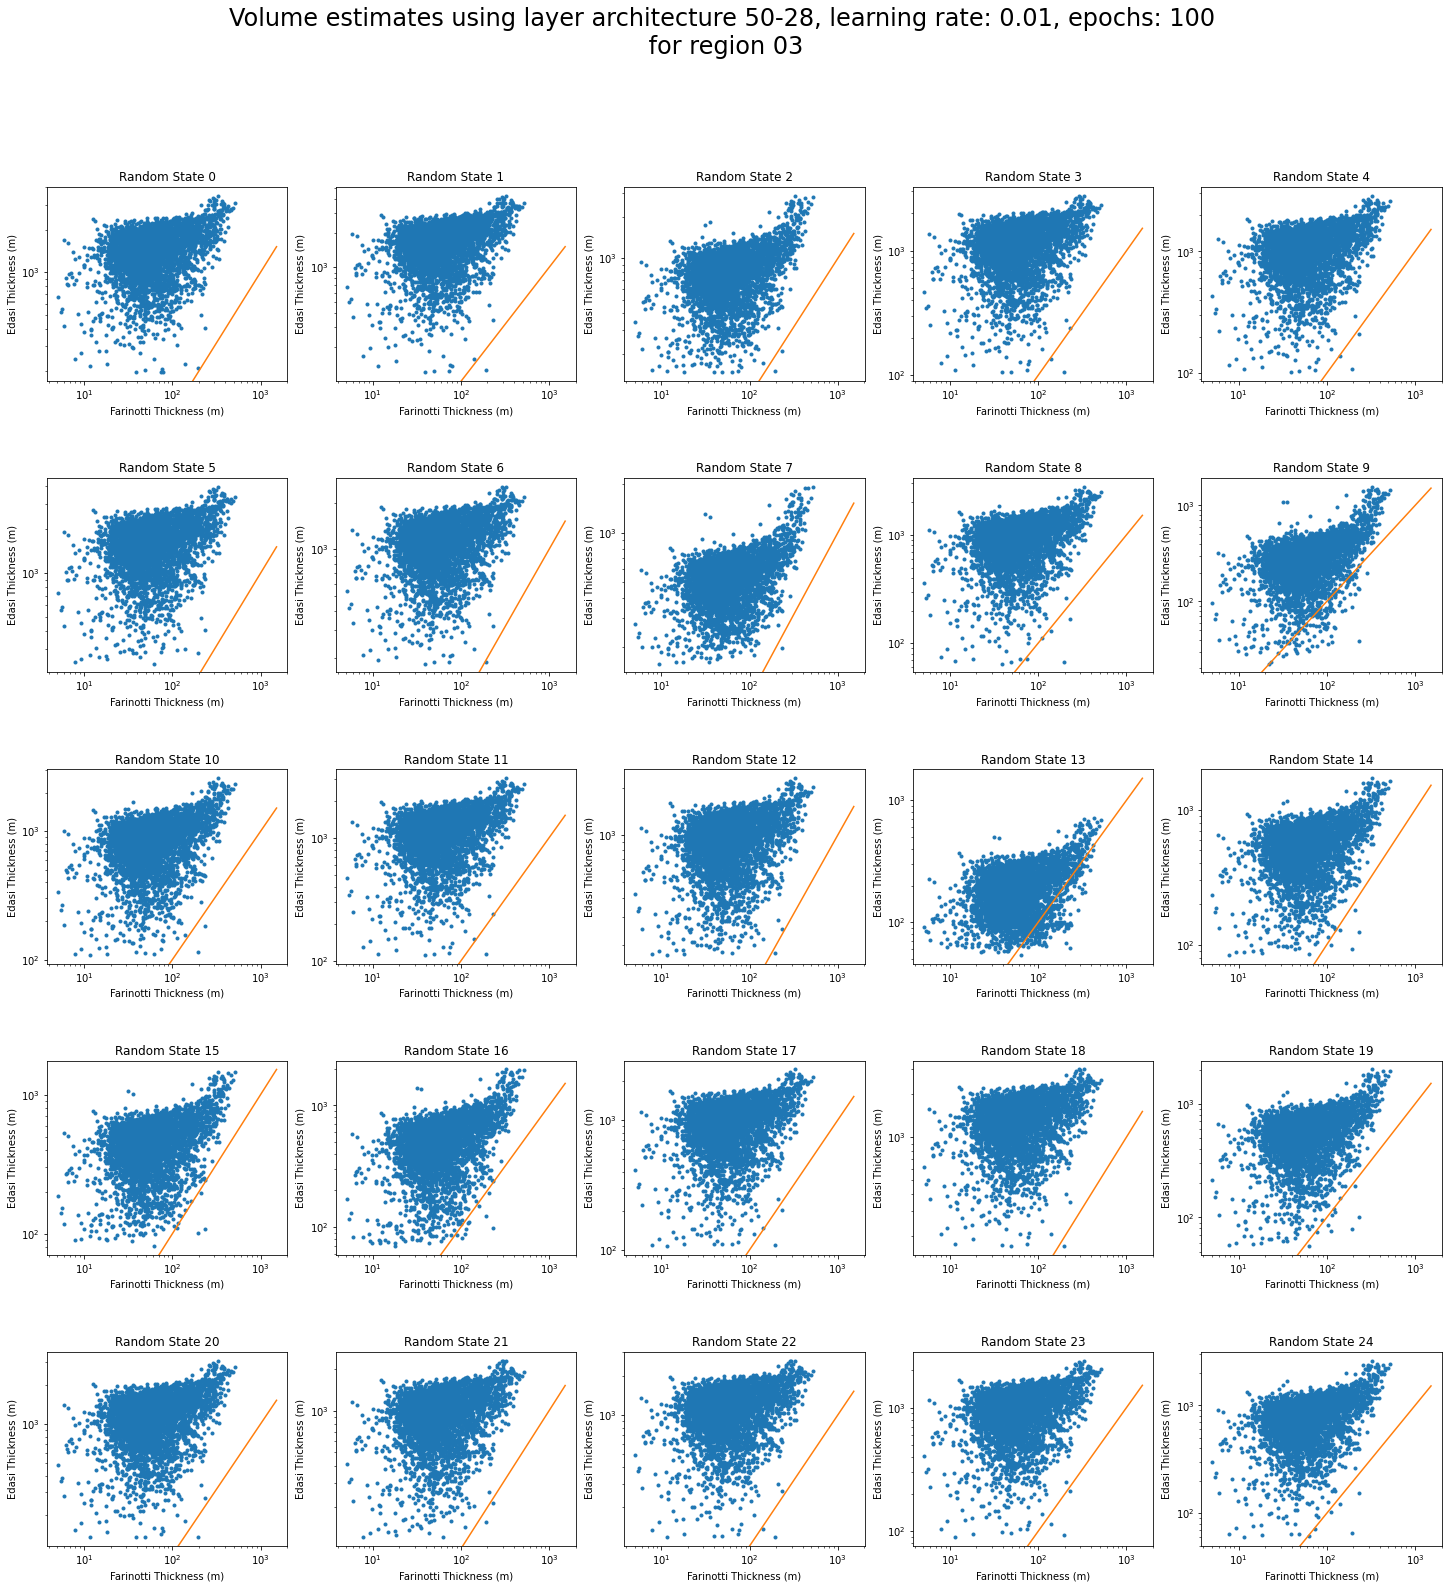

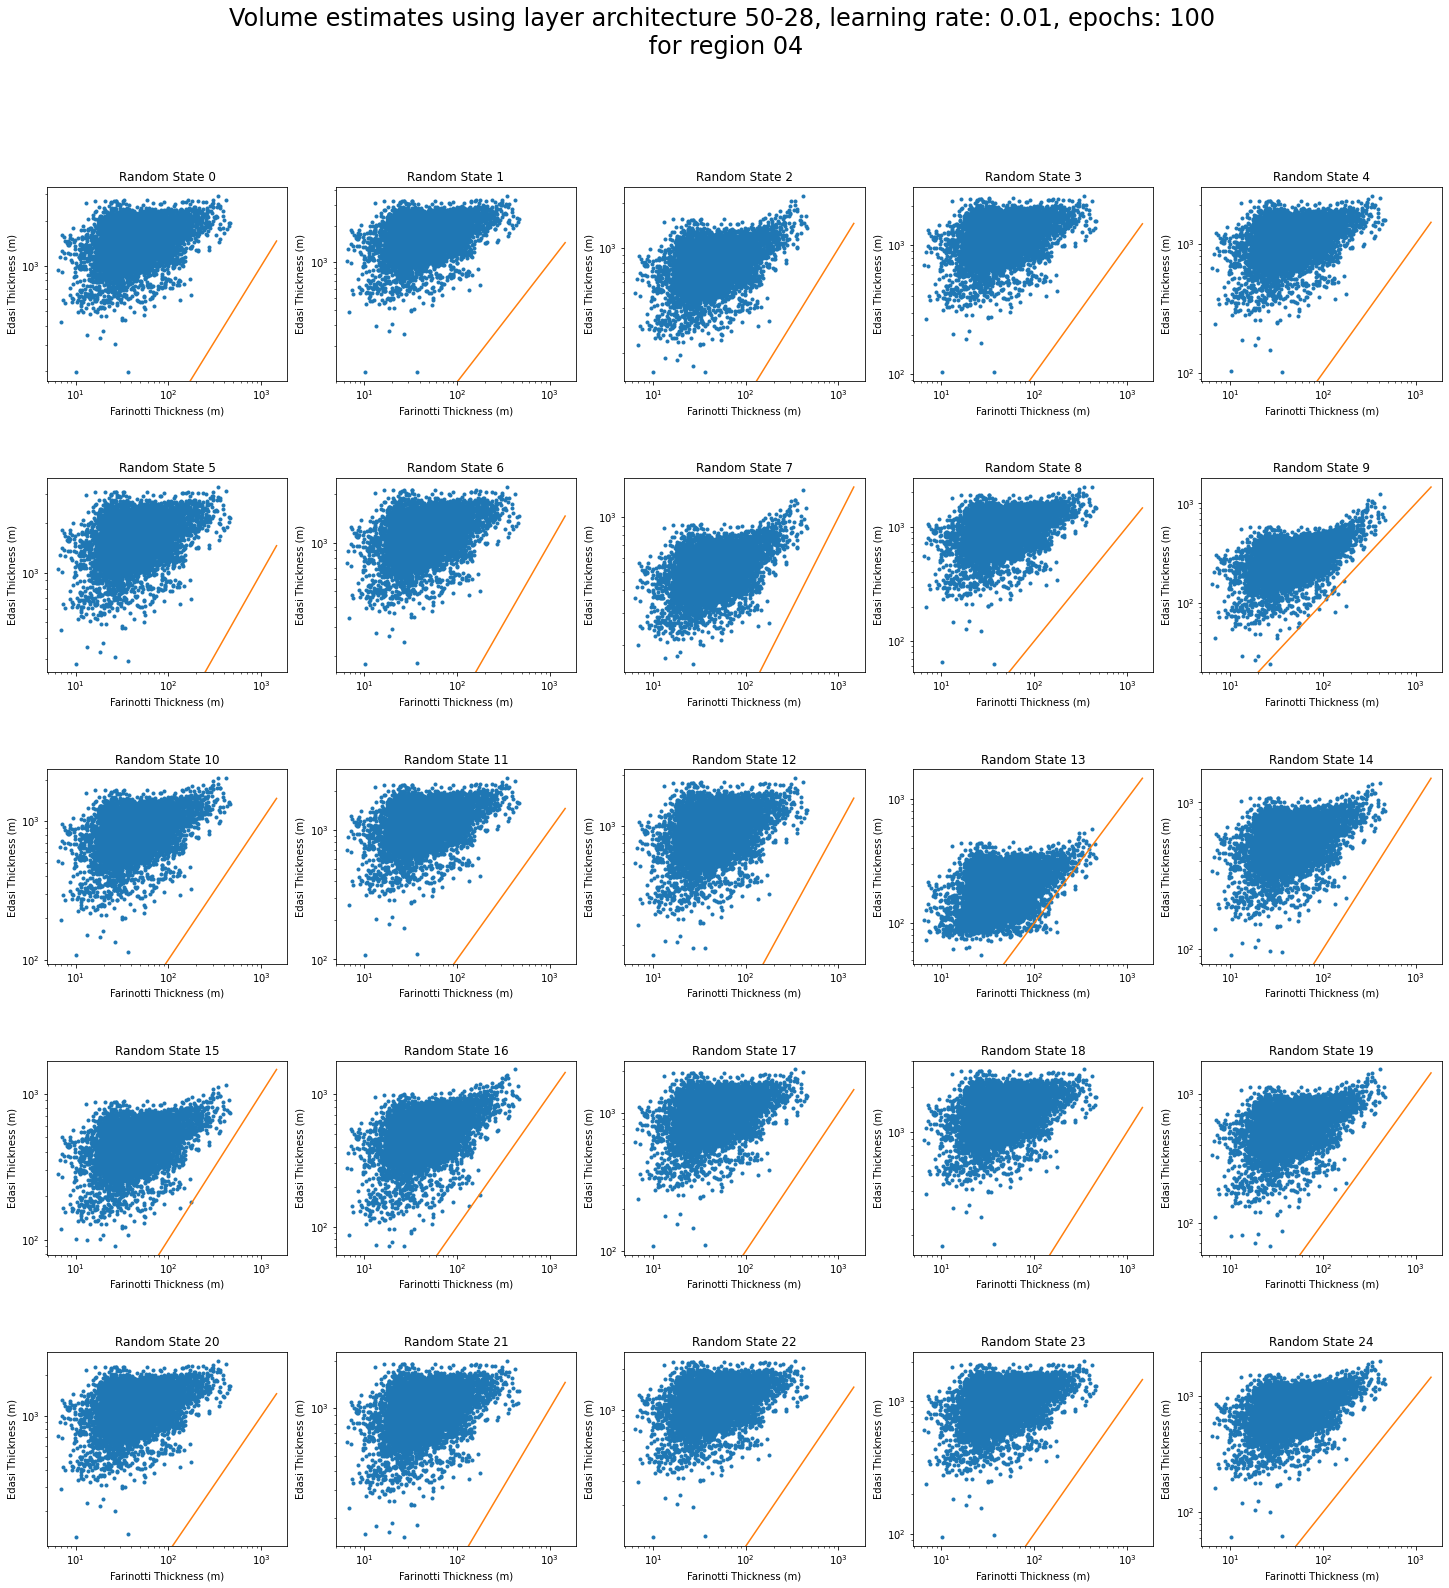

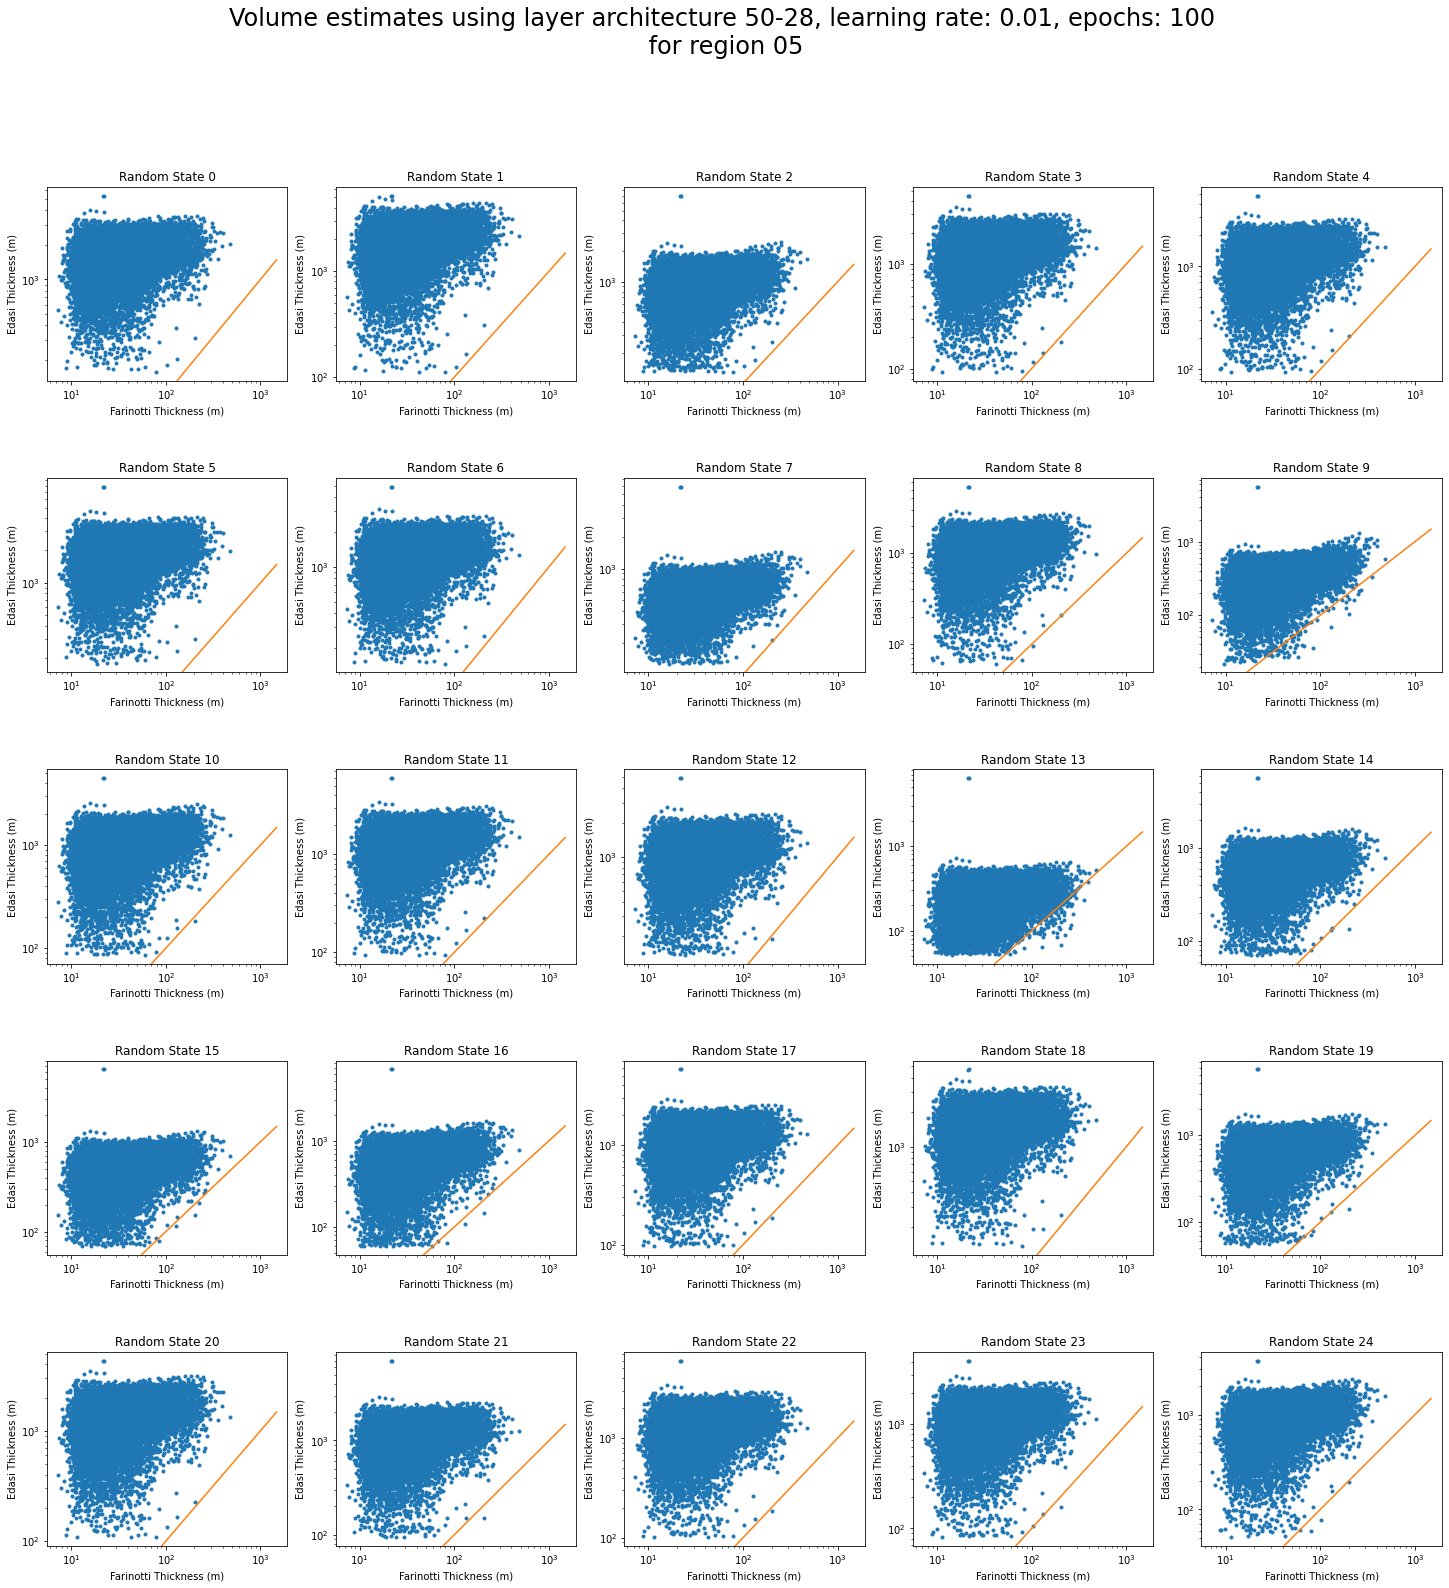

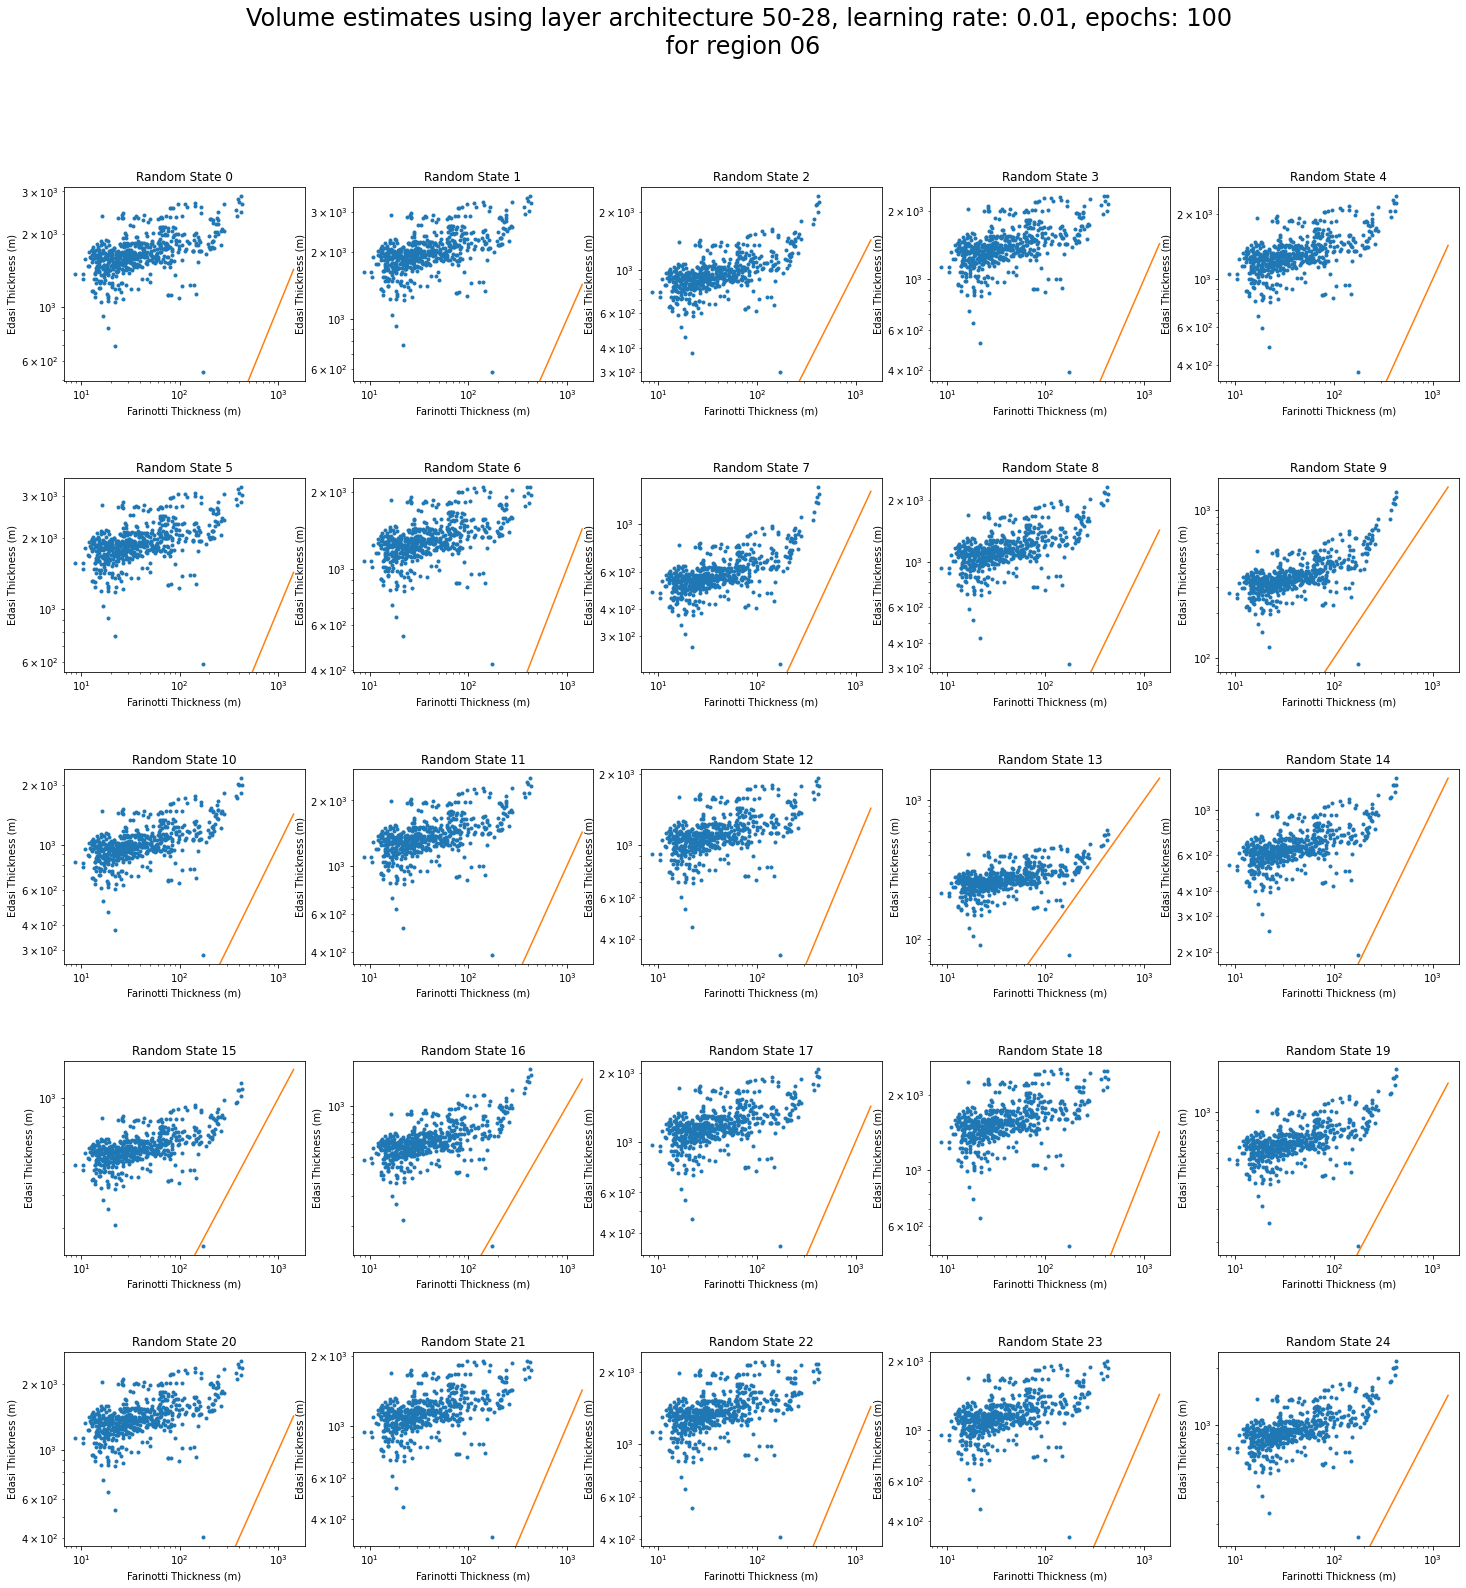

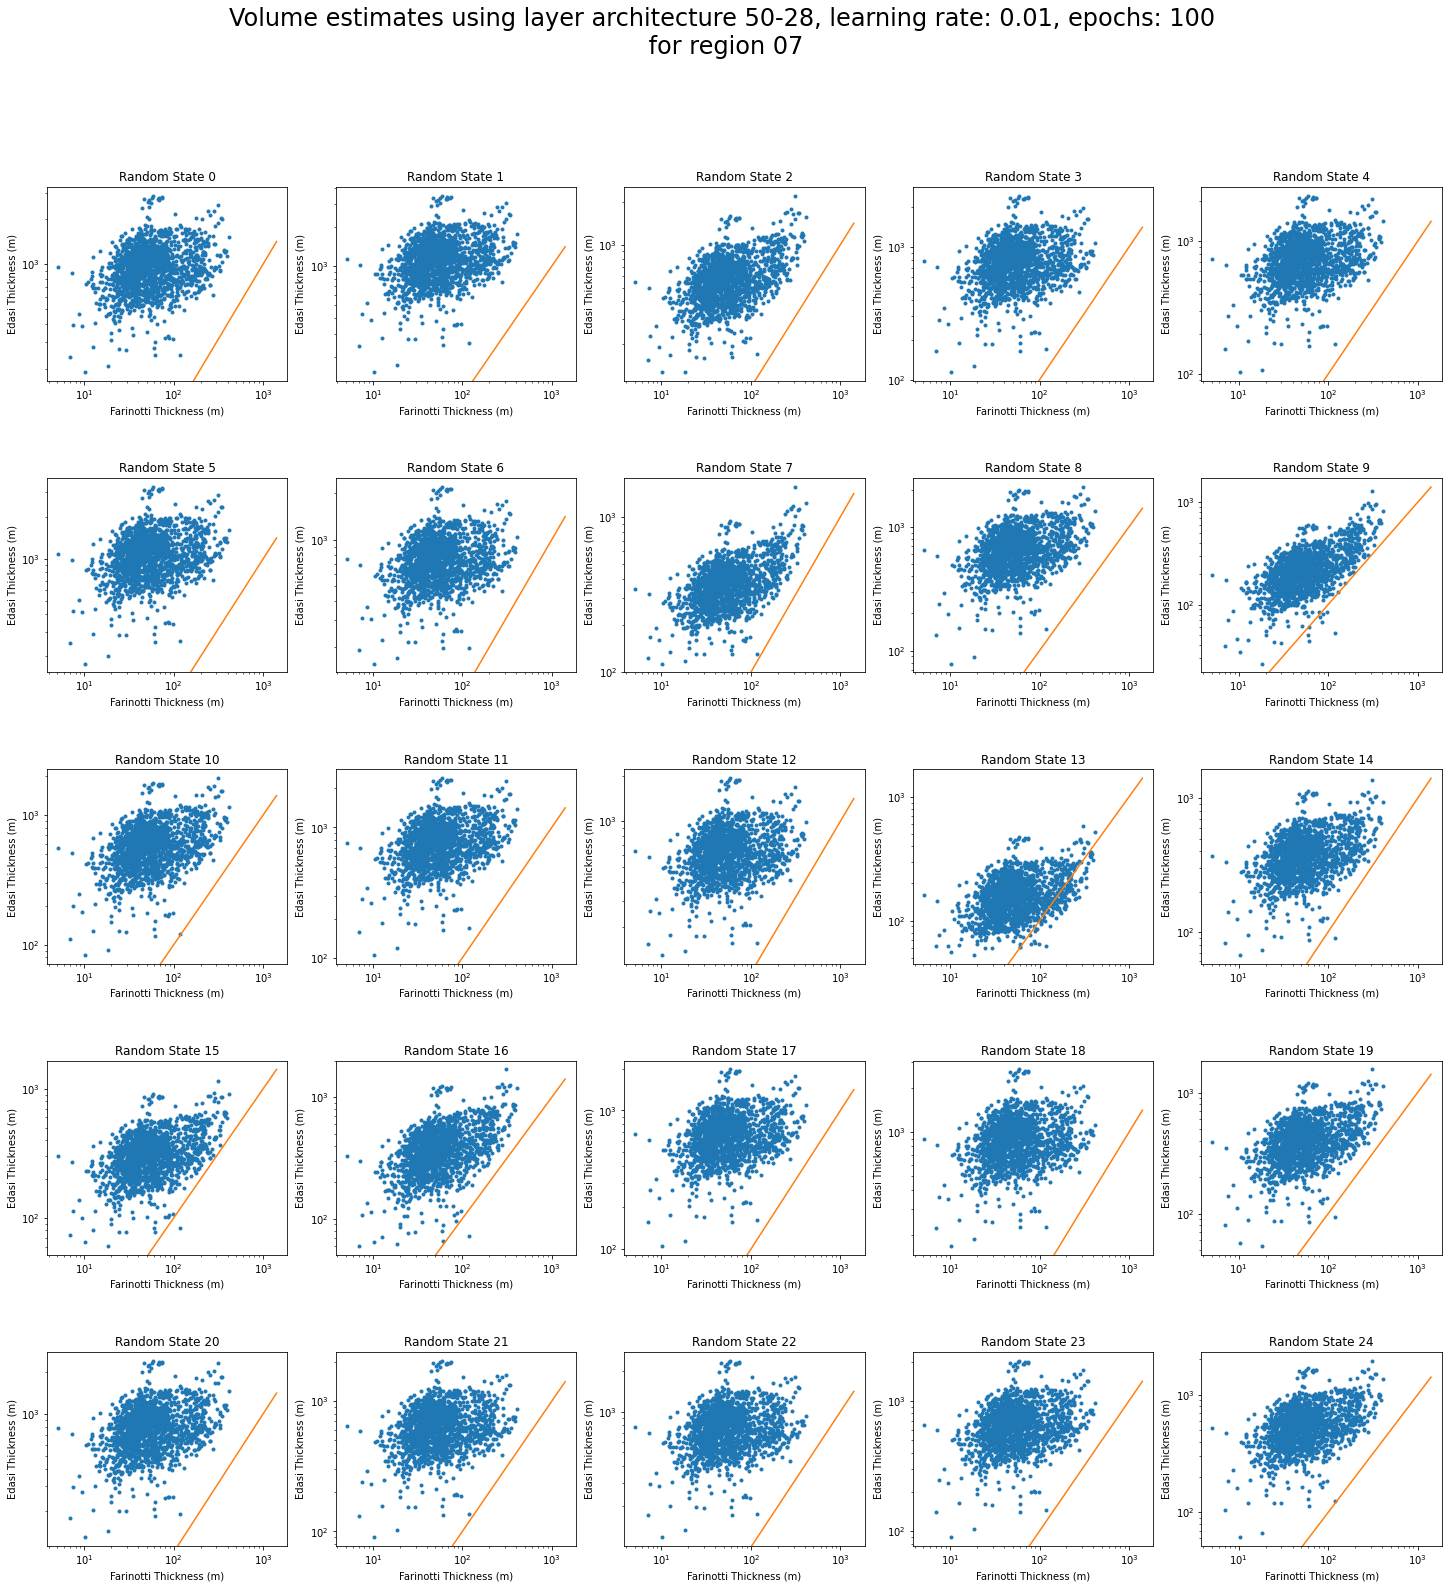

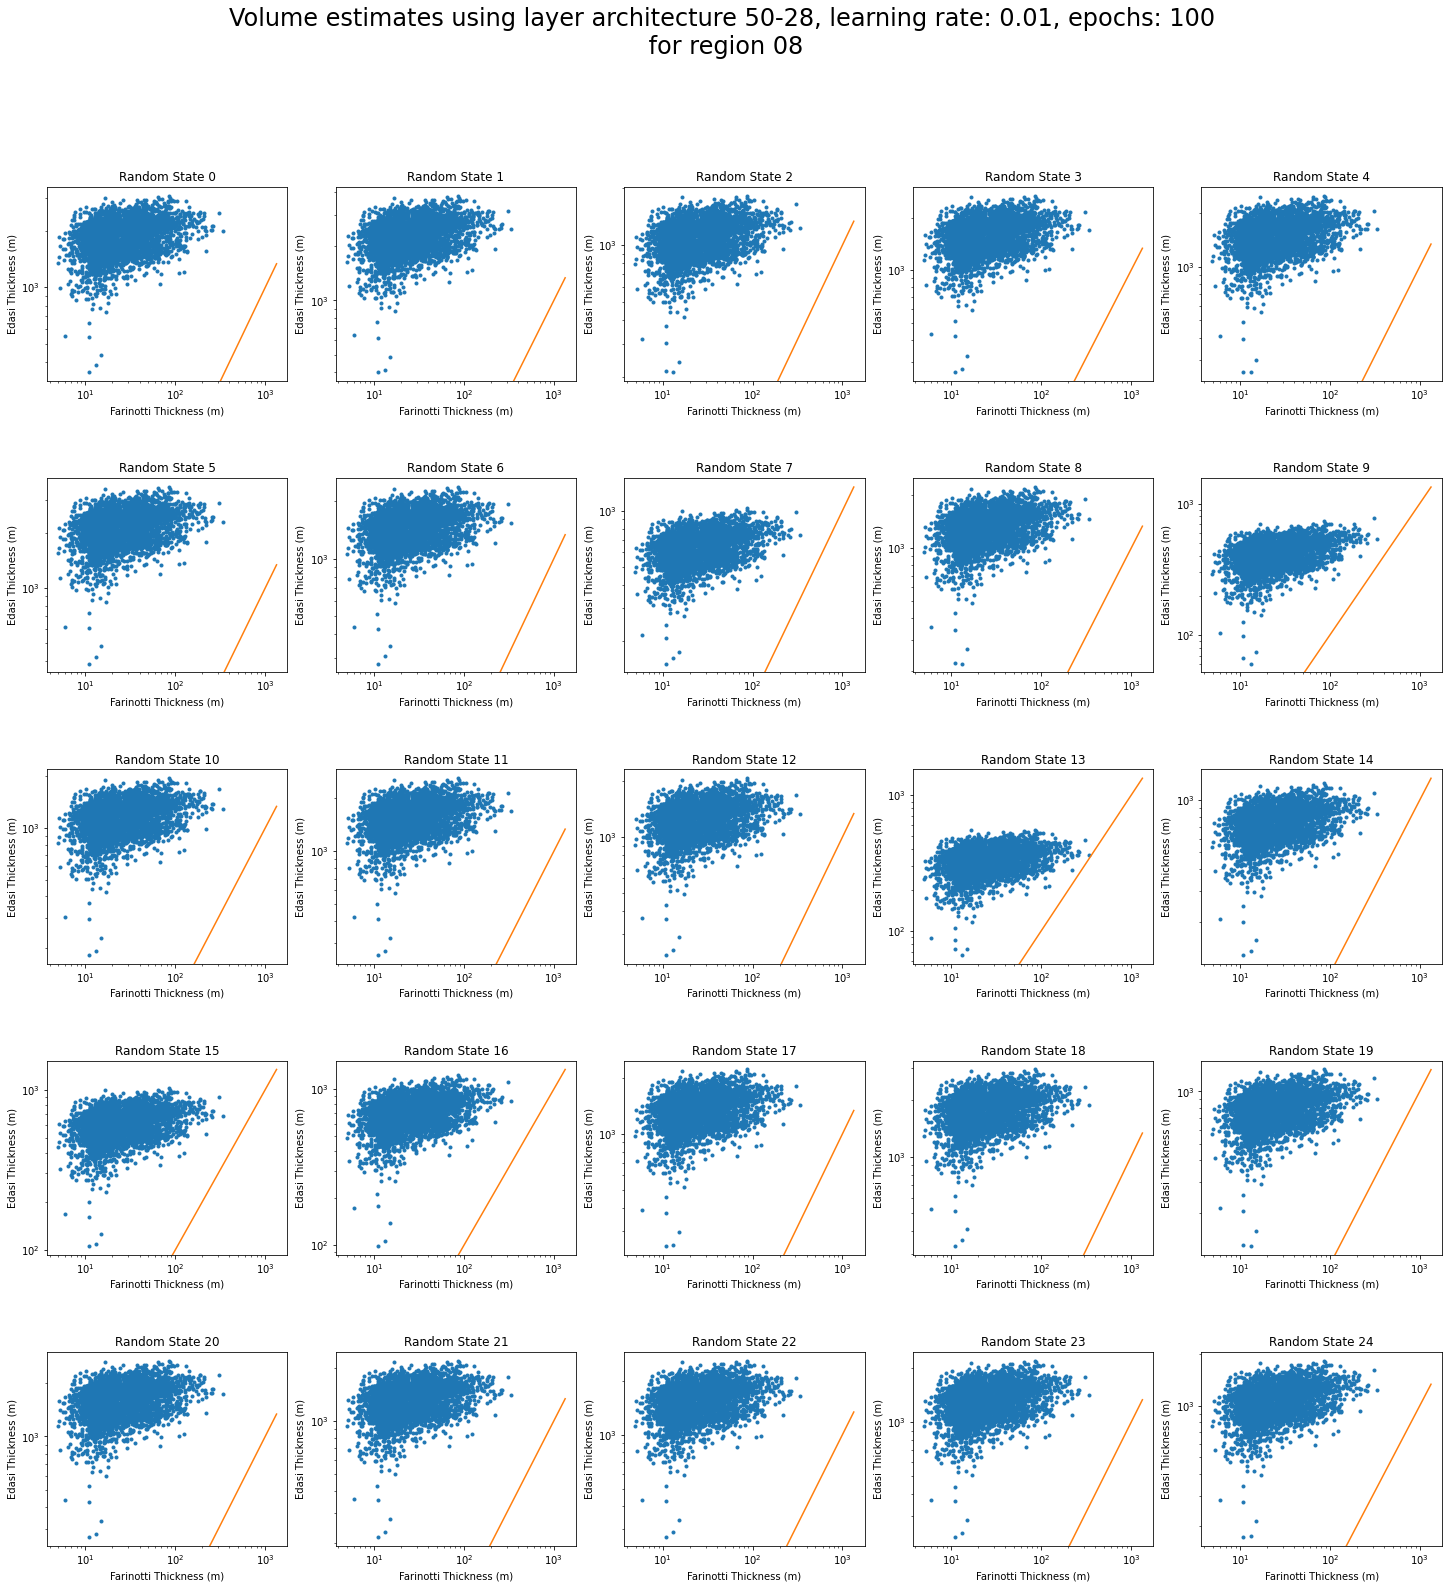

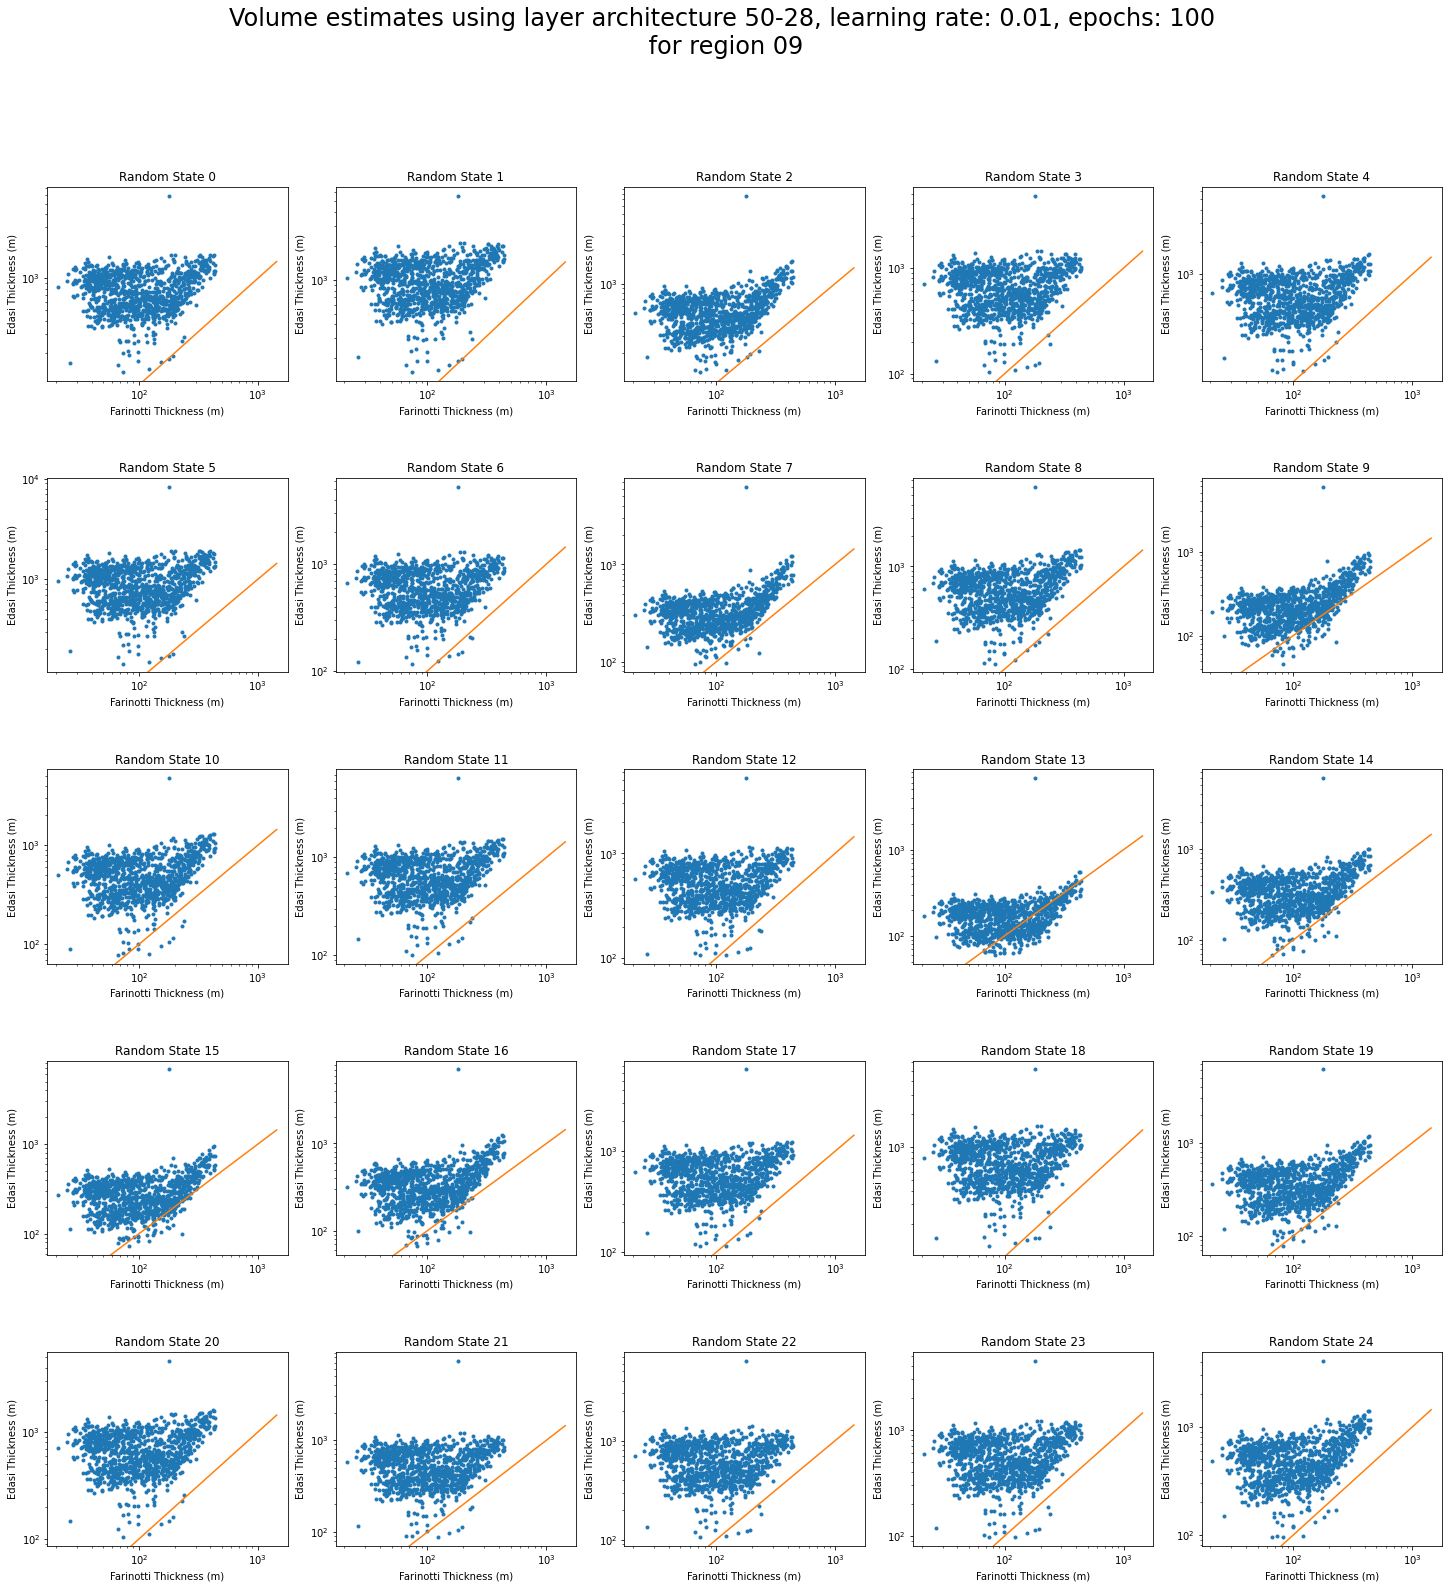

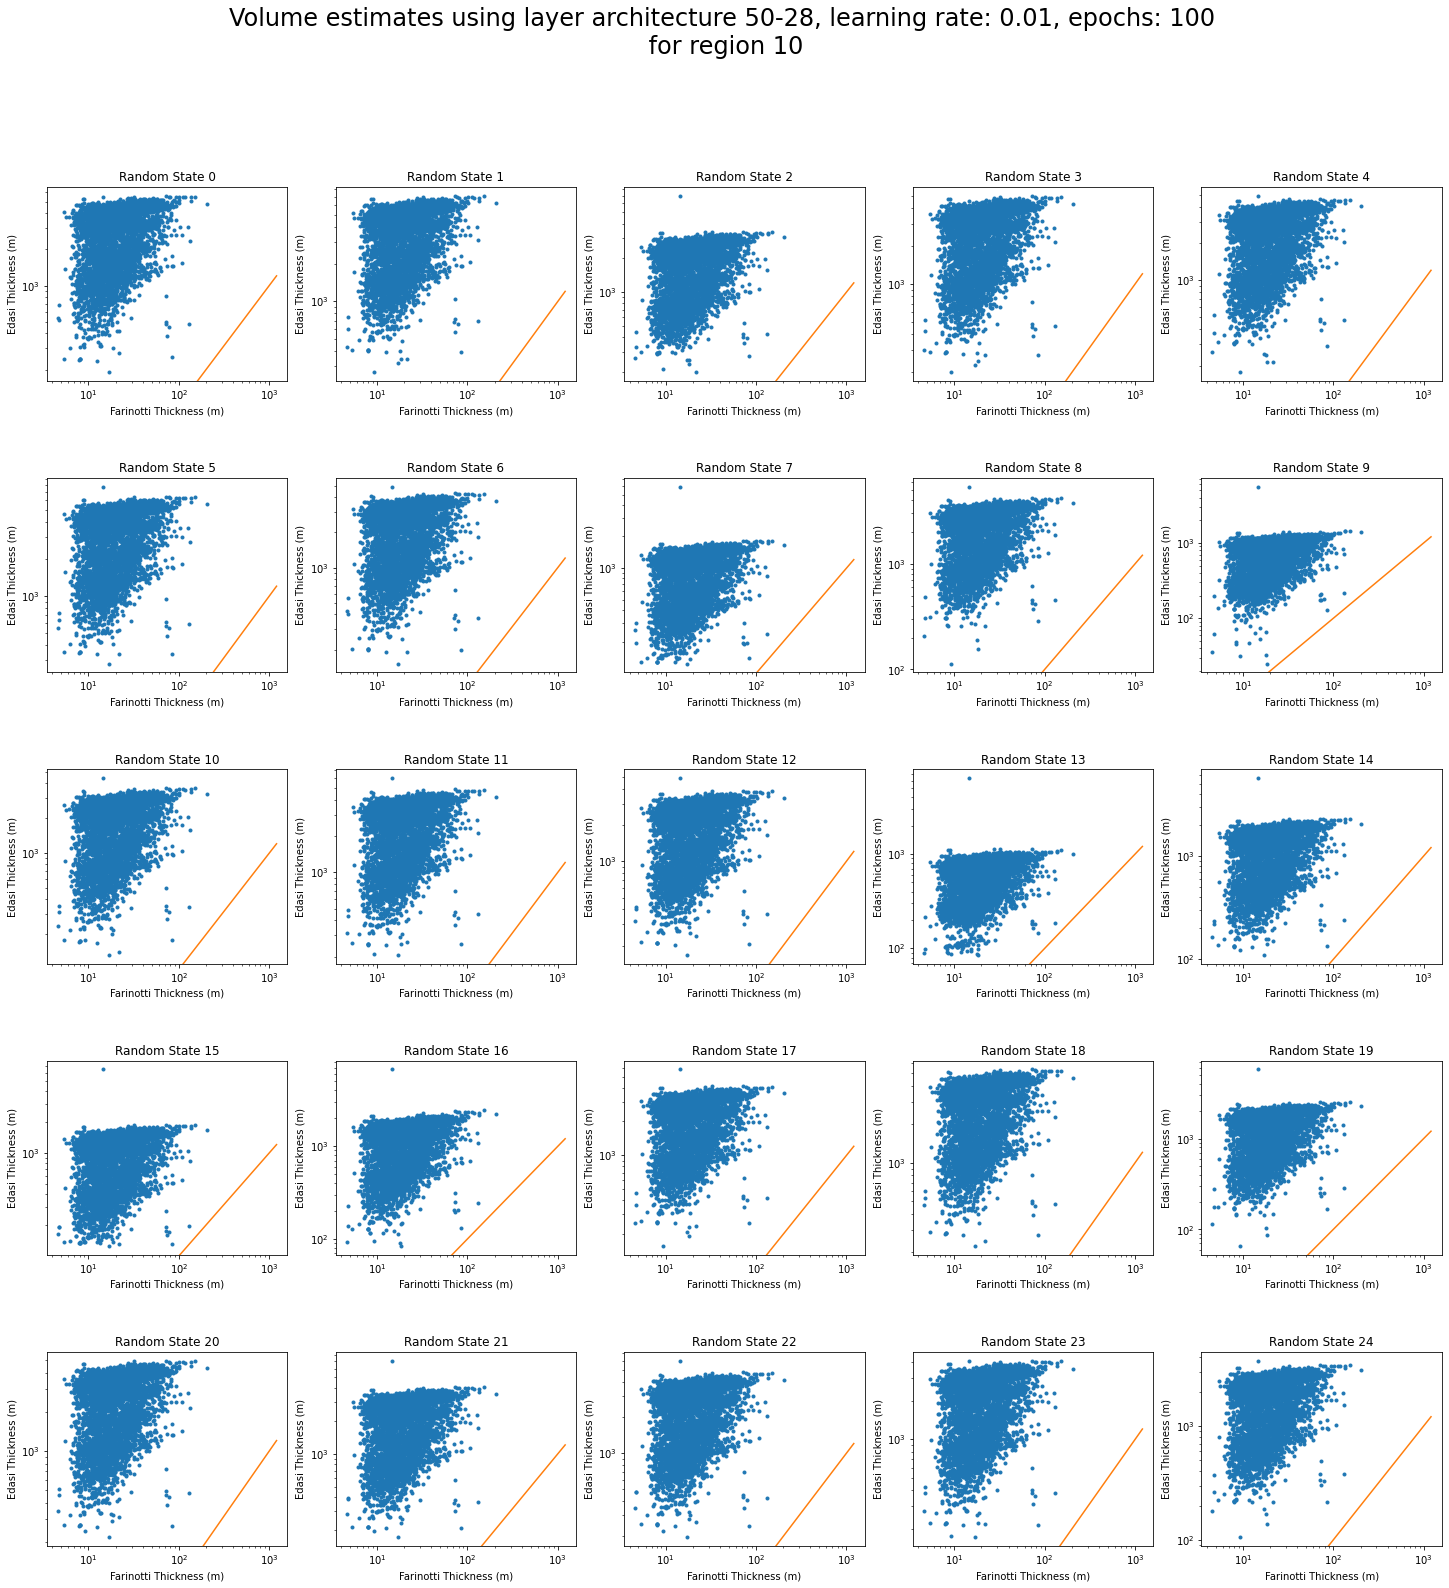

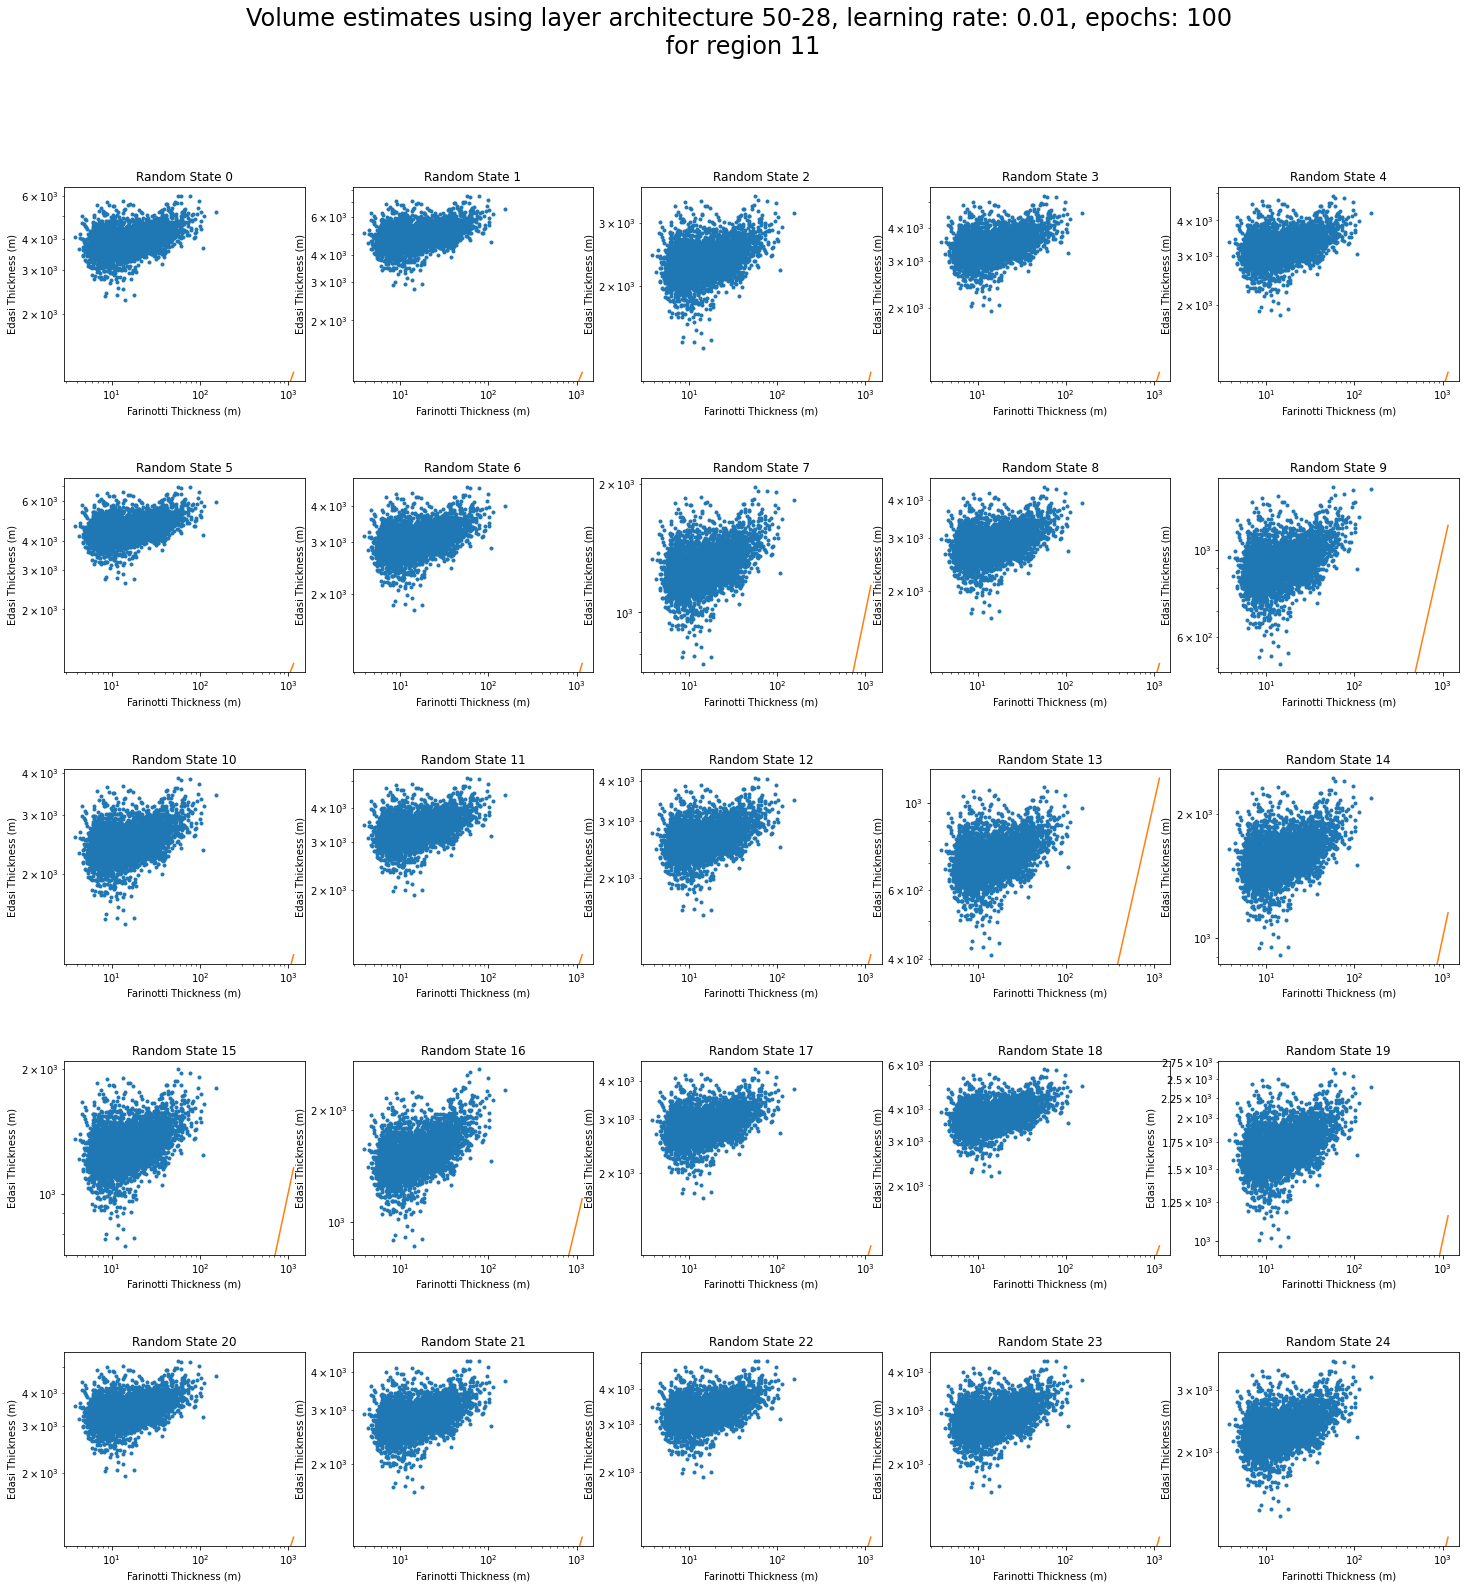

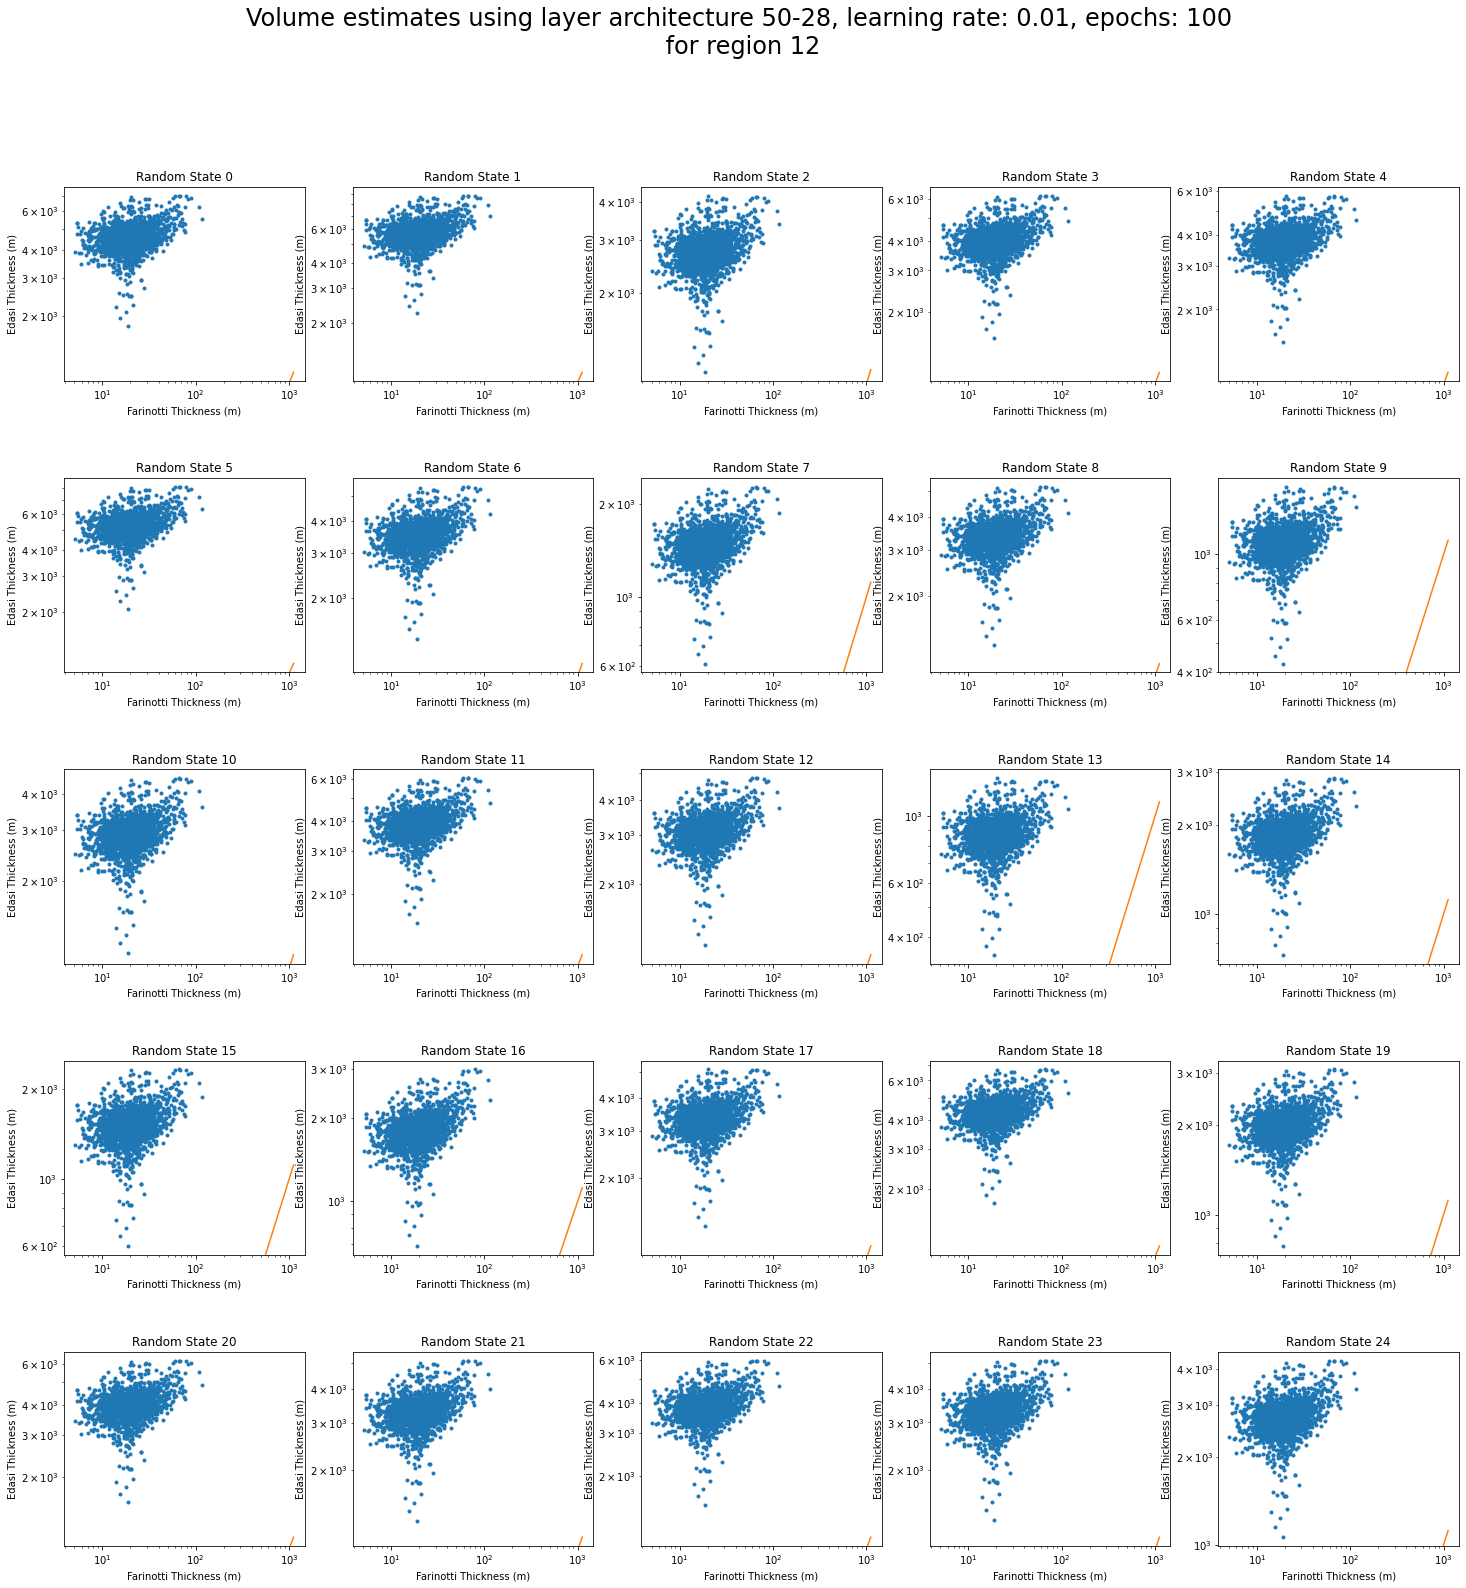

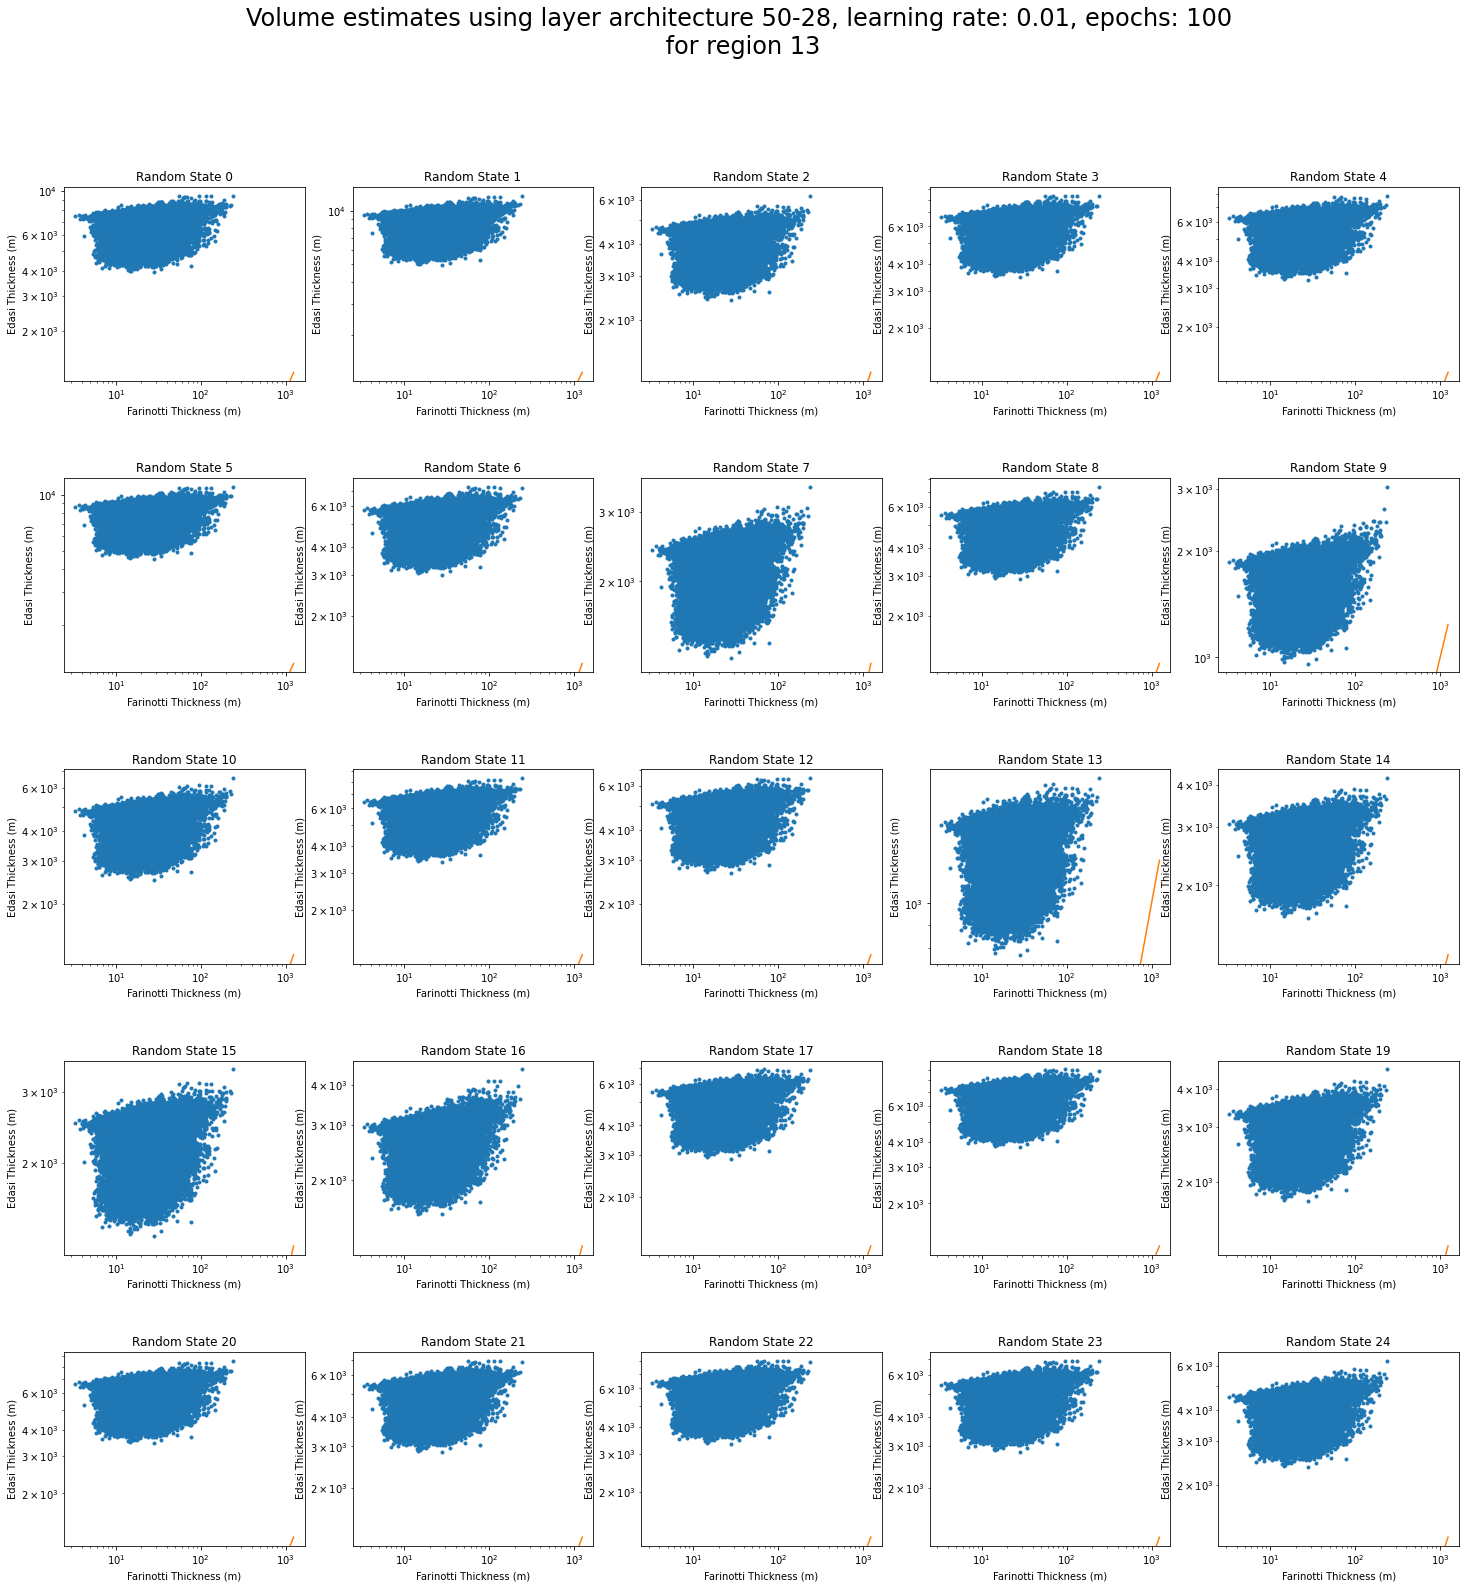

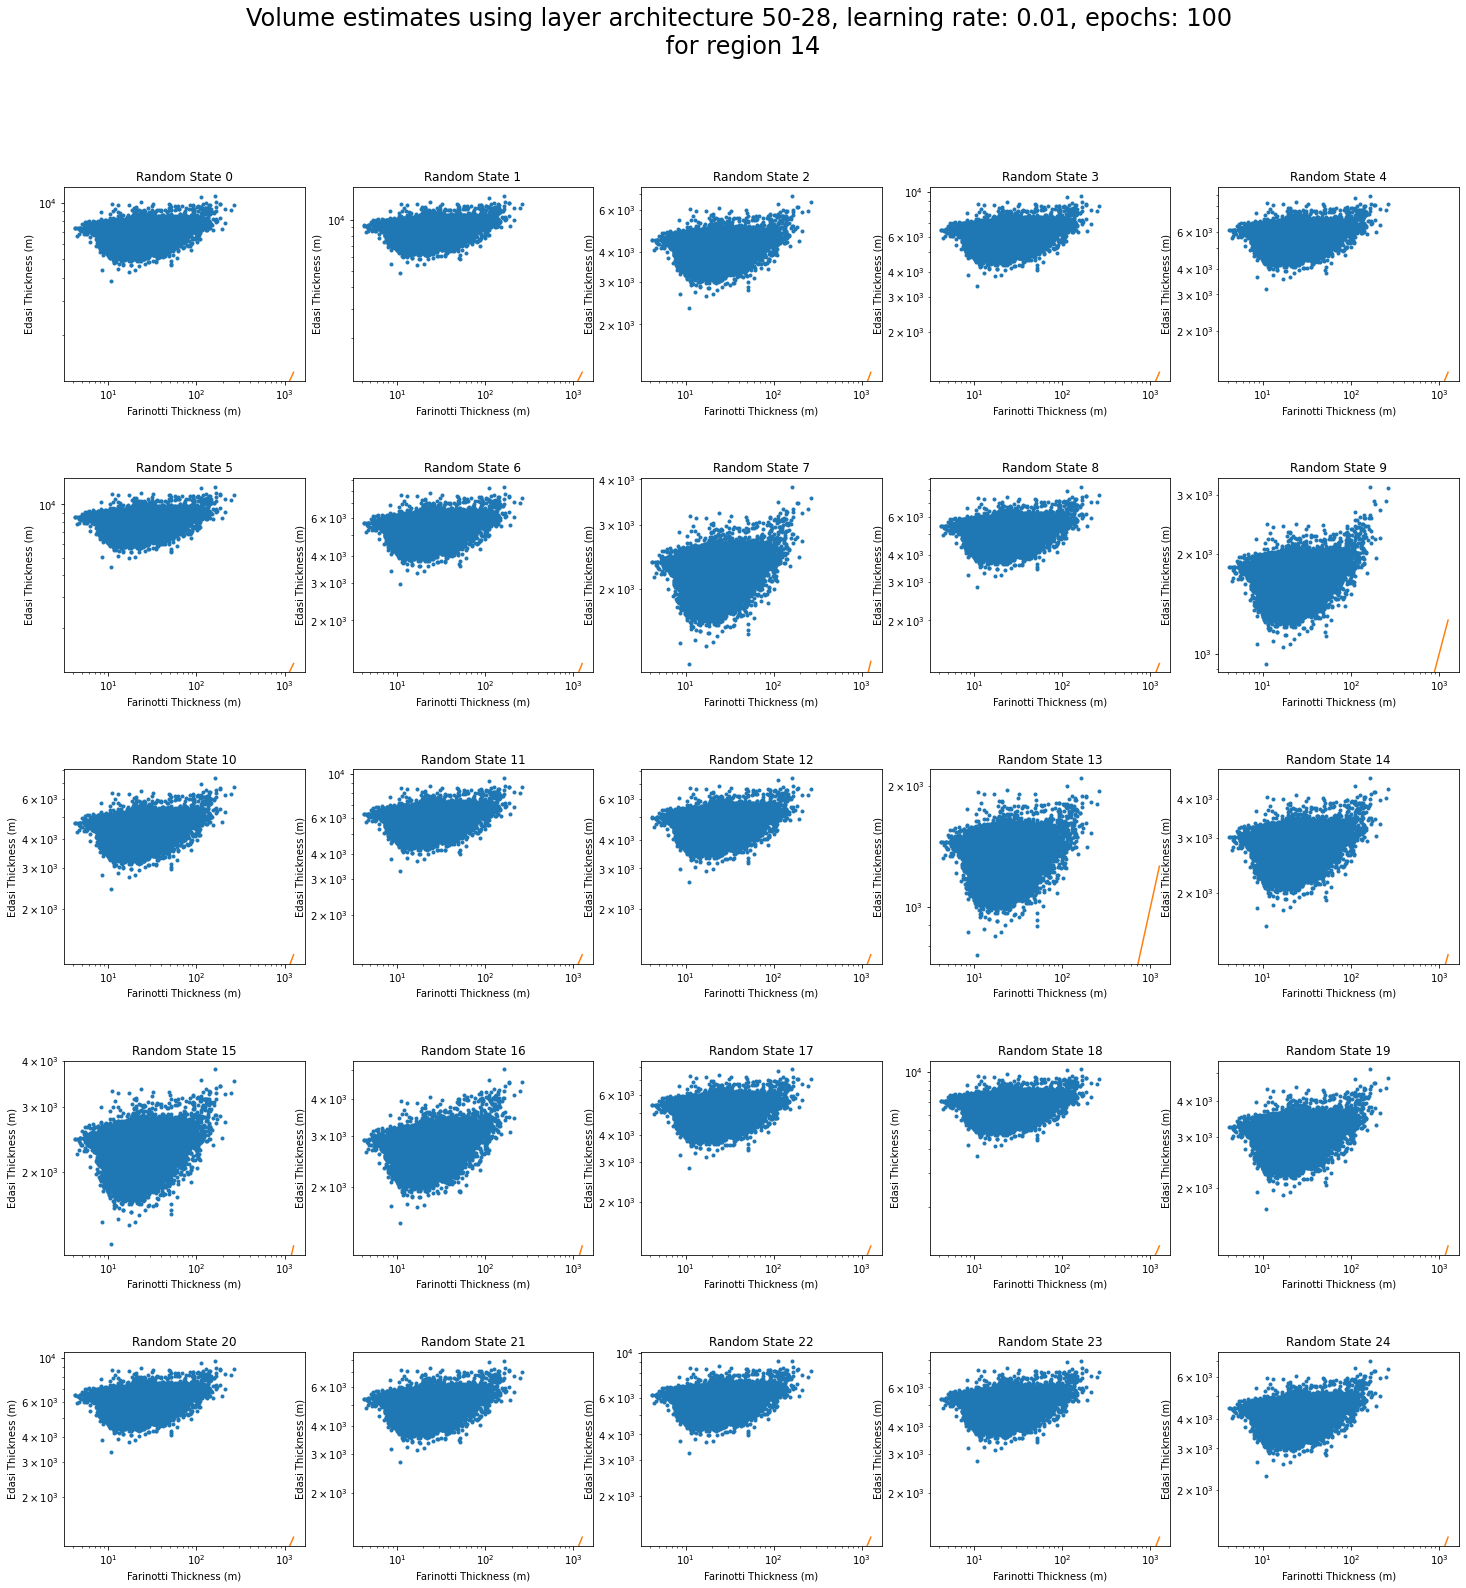

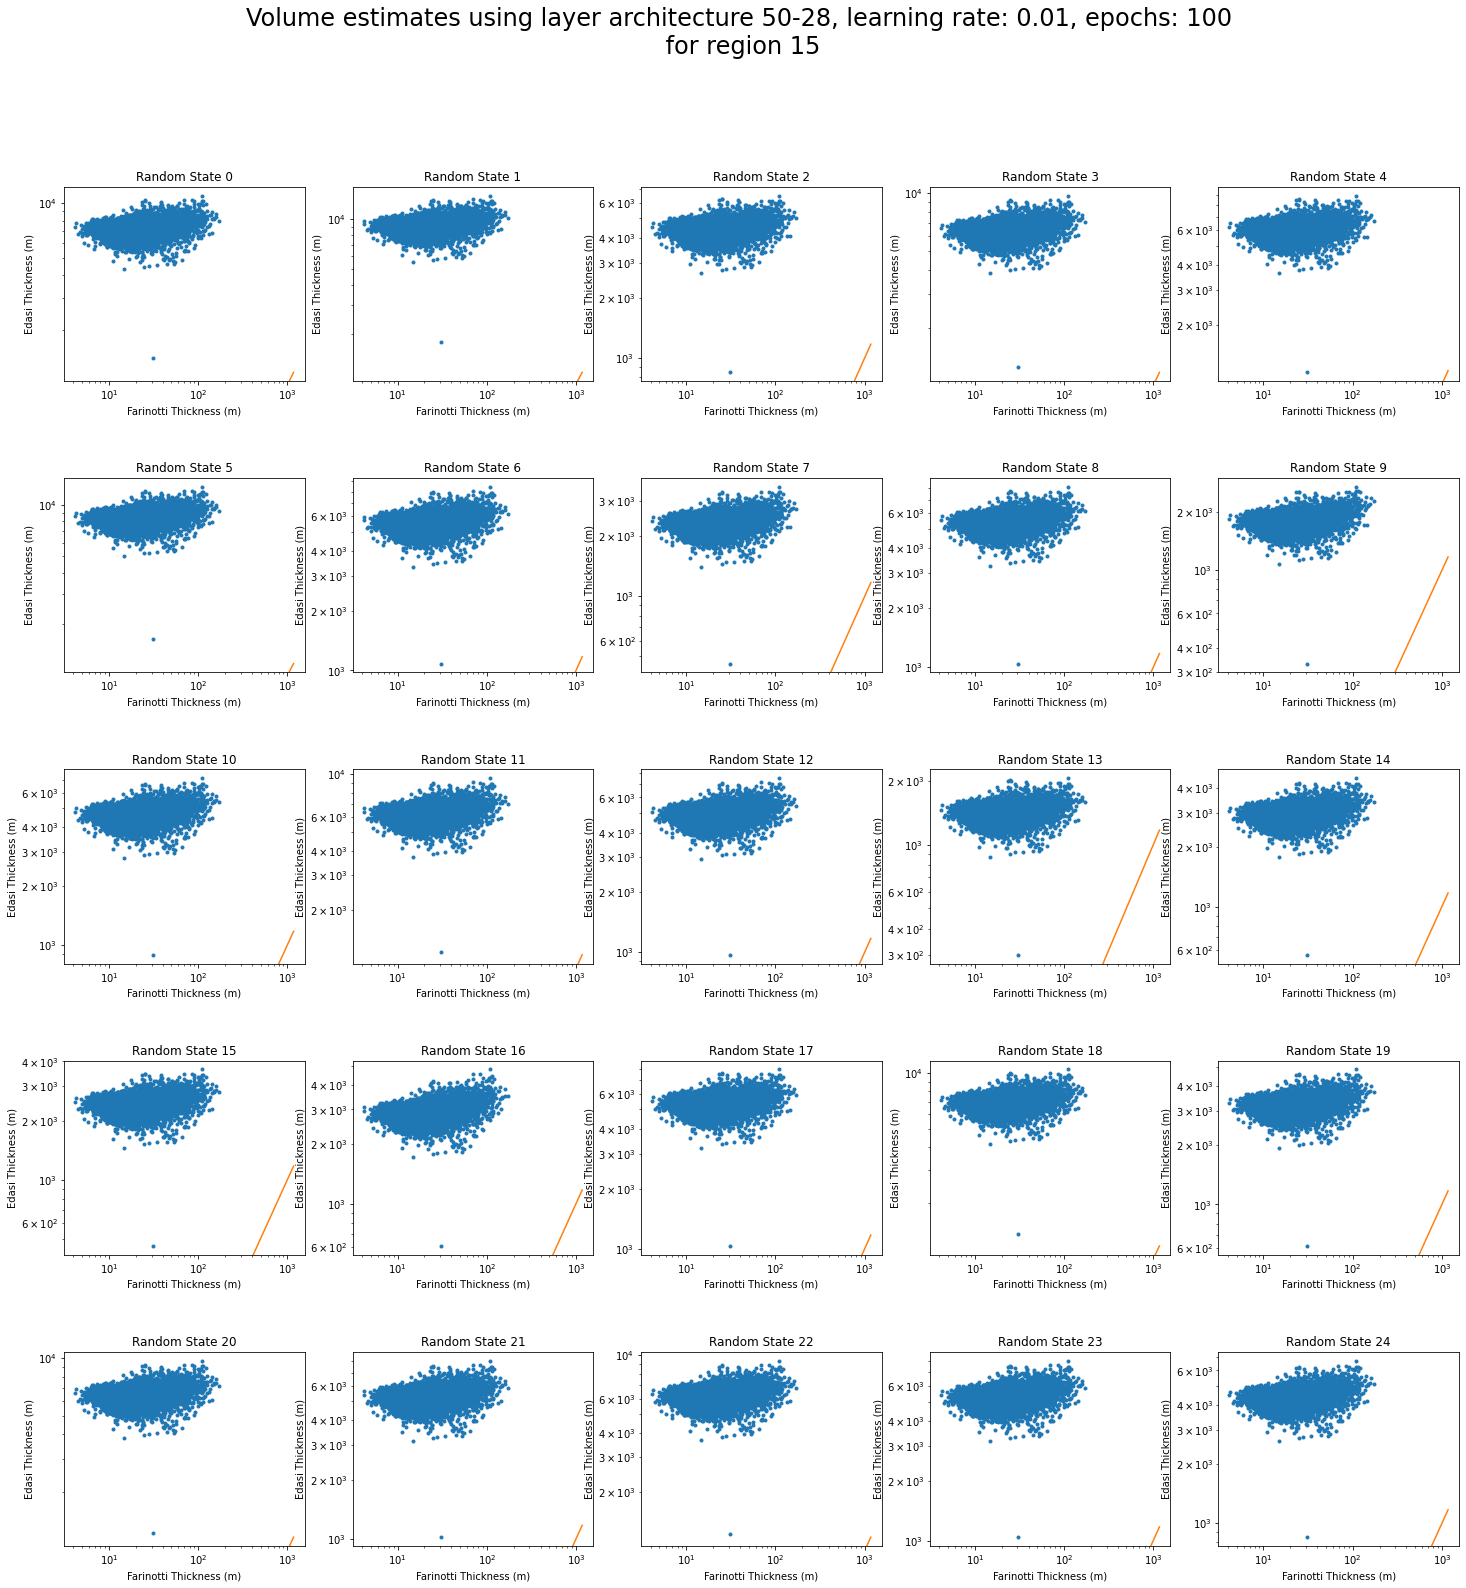

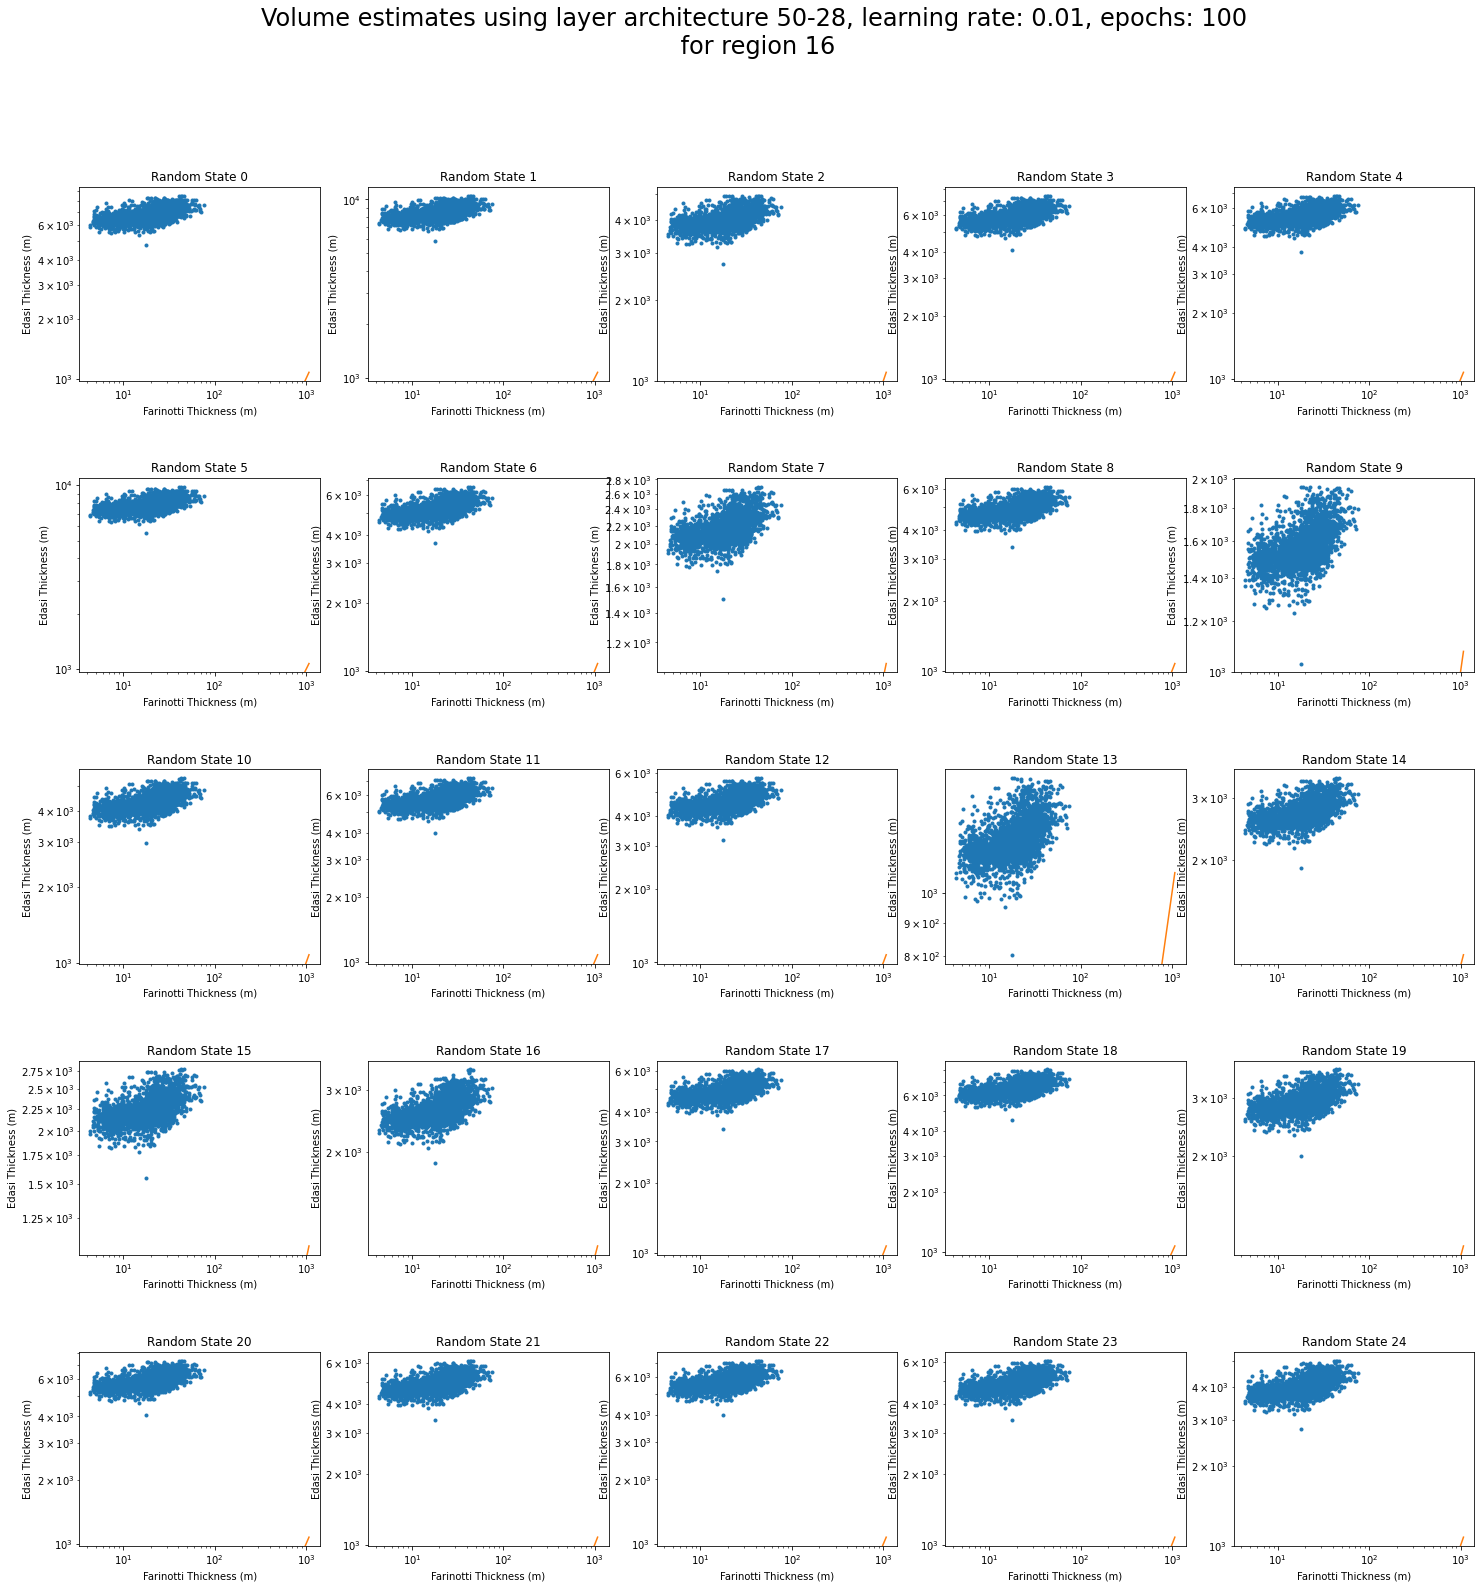

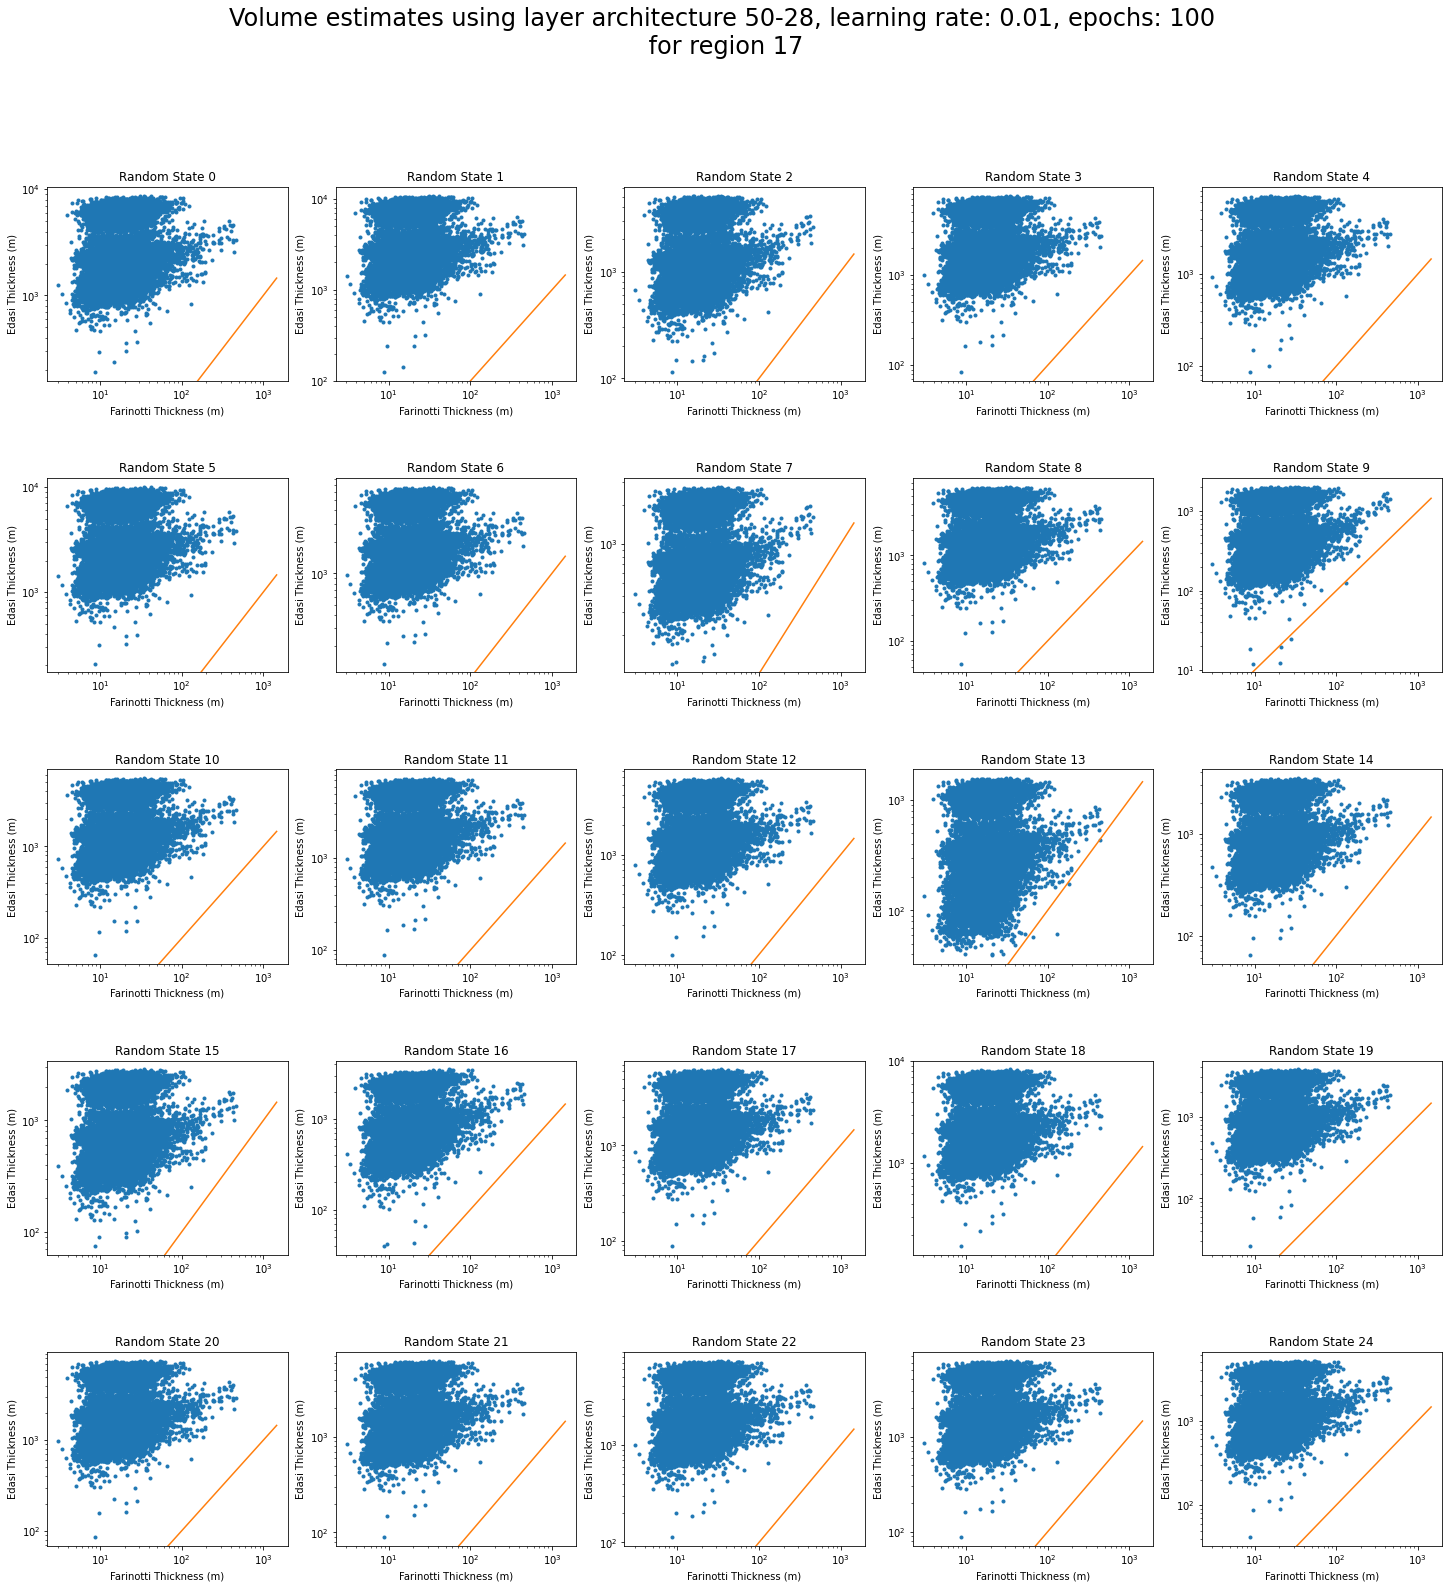

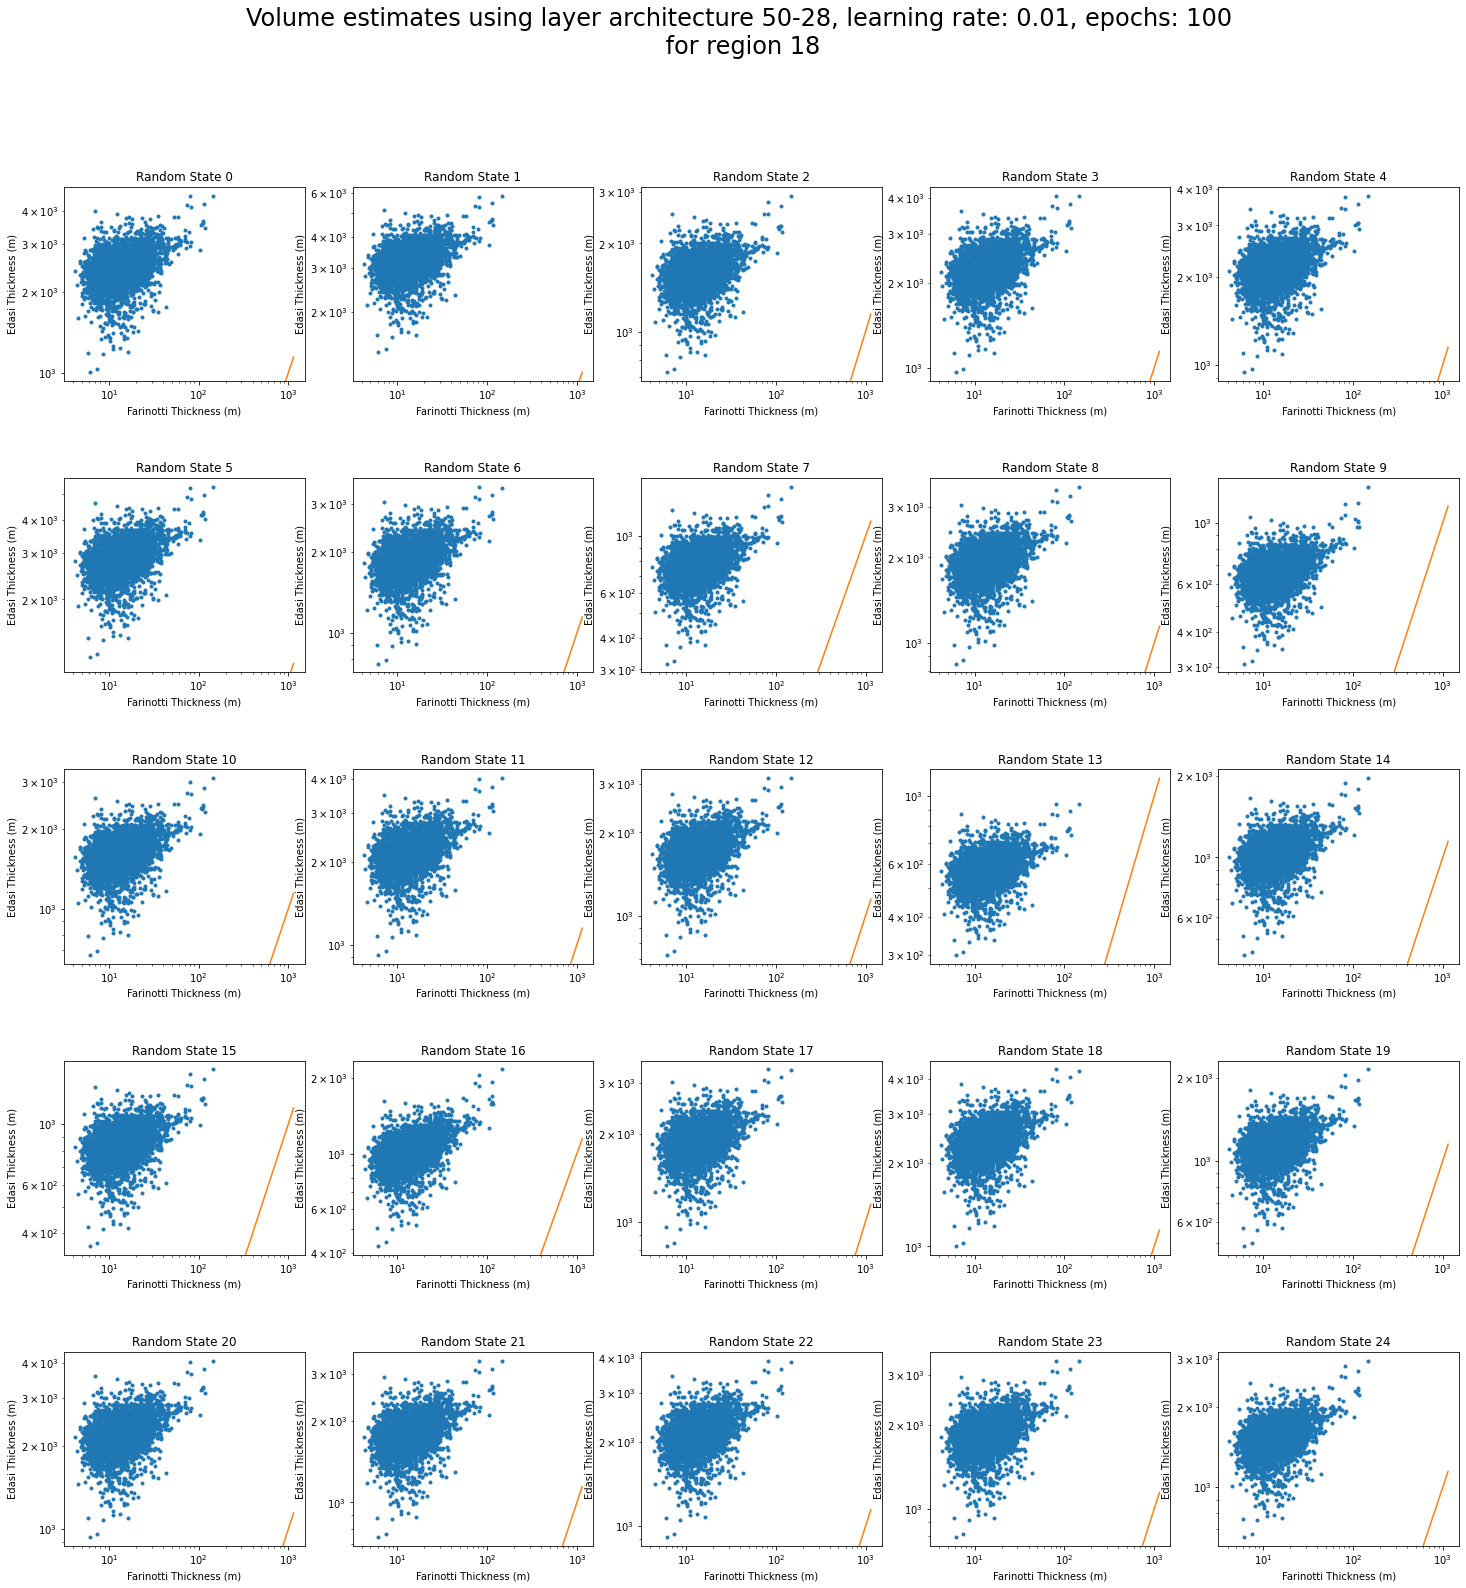

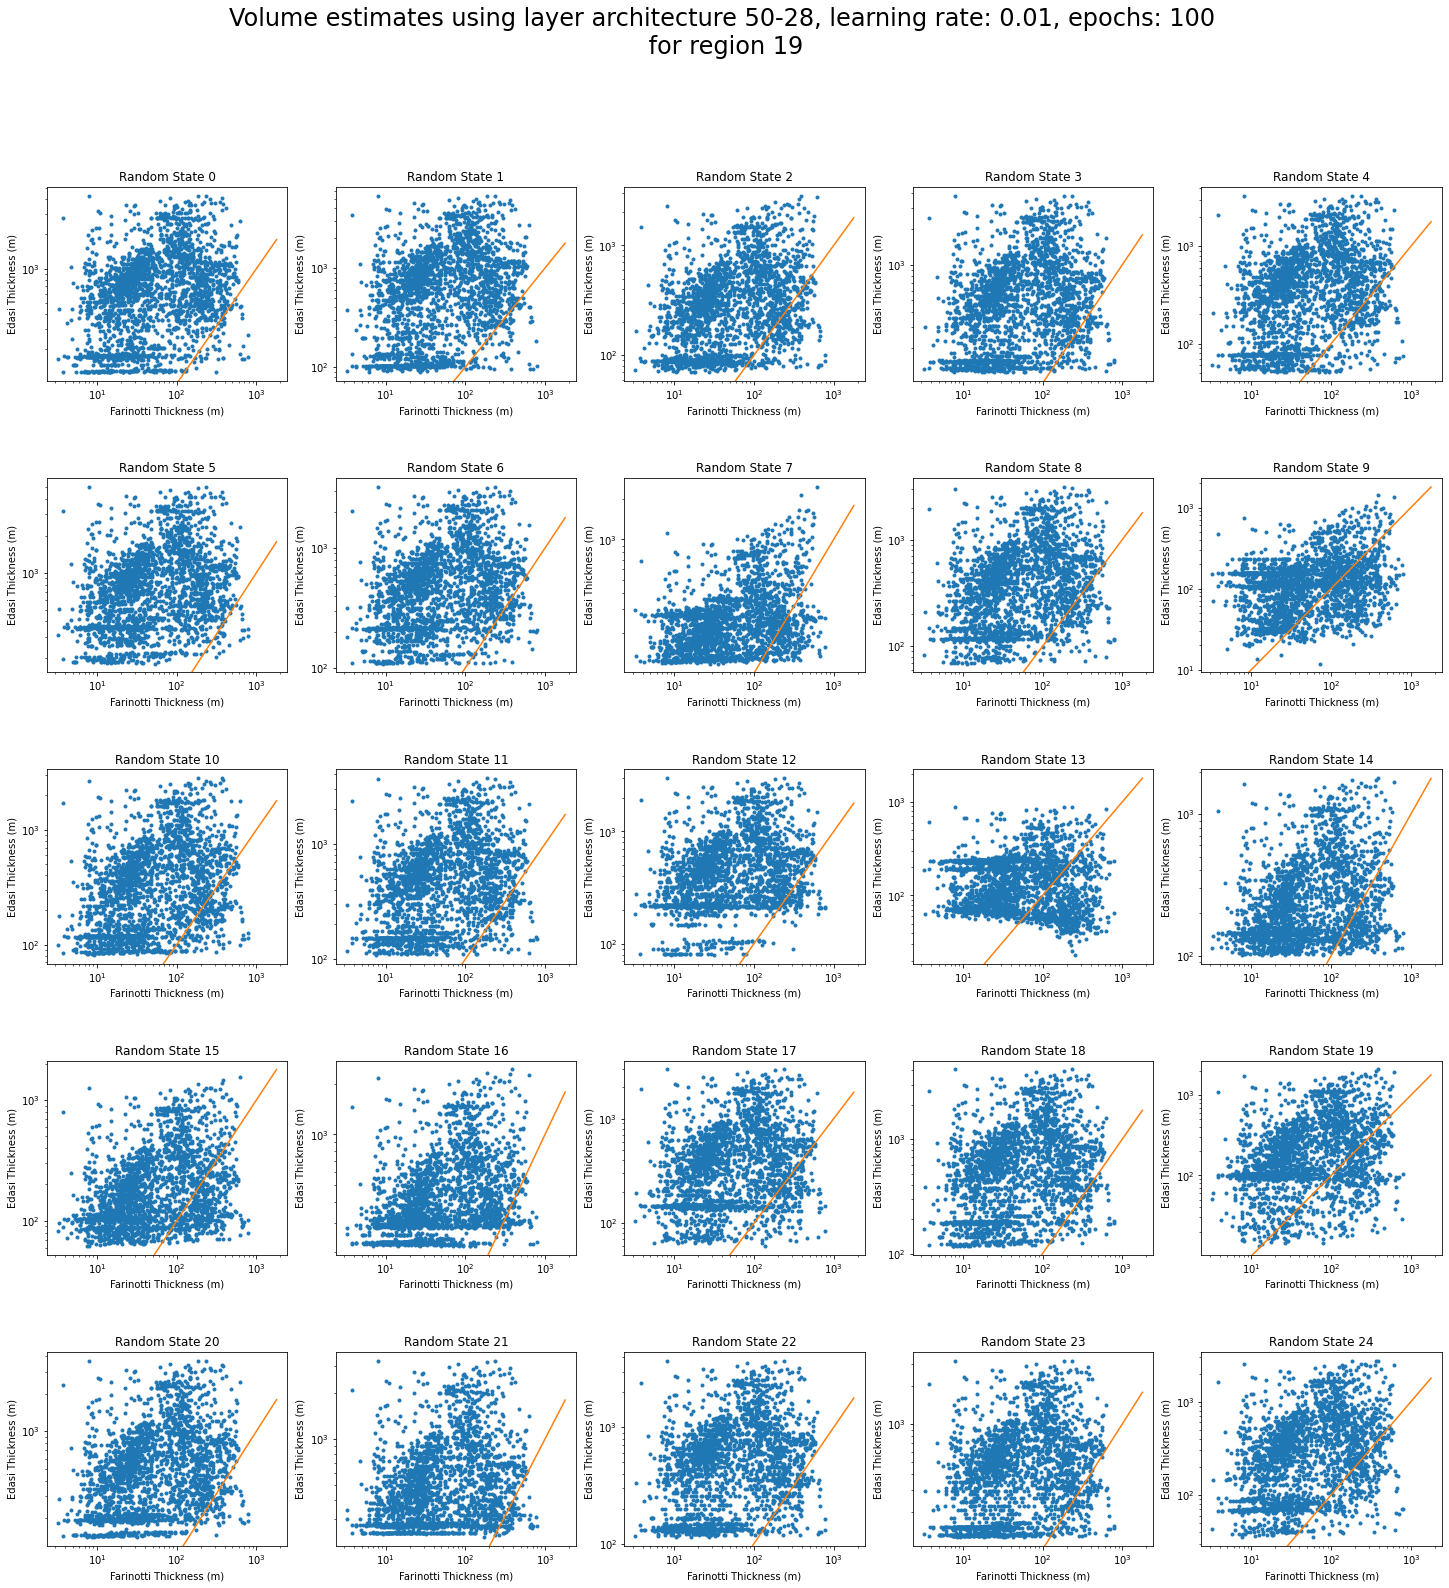

In [11]:
df1= pd.read_csv('reference_thicknesses/results_1_mean_thicknesses.csv')
df1 = df1.drop('Unnamed: 0', axis = 1)
# df1.min()
df1 = df1.dropna()
df1

RGI = gl.RGI_loader(
#     pth = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
)

RGI = RGI.sort_values('RGIId')


RGIf = pd.merge(RGI, df1, on = 'RGIId')
RGIf = RGIf.dropna()
# RGIf.to_csv('reference_thicknesses/res1_w_RGI.csv')


df = RGIf


RGI = RGIf[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
]]
RGI


arch = '50-28'
top_learning_rate = 0.01
epochs = 100
dropout = 1

df7 = gl.data_loader(
# root_dir = '/home/simonhans/data/prethicktor/'
)
module = 'sm7'
res = 'sr7'
dataset = df7 
dataset.name = 'df7'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'


# pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
pth_2 = '/data/fast1/glacierml/data/RGI/rgi60-attribs/'
RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])


for region_number in tqdm(range(1,20,1)):

#     print(RGI)
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
#     print(region_number)
    for file in (os.listdir(pth_2)):
#         print(file[:2])
        if str(file[:2]) == str(region_number):
#             print(str(file[:2]))
            RGI_region = pd.read_csv(pth_2 + file, encoding_errors = 'replace', on_bad_lines = 'skip')
    
    dft = df[df['RGIId'].str.contains('RGI60-' + str(region_number))]
    dft = dft[[
        'RGIId',
        'Farinotti Mean Thickness'
    ]]

    RGI_region = RGI_region[[
        'RGIId',
        'CenLat',
        'CenLon',
        'Slope',
        'Zmin',
        'Zmed',
        'Zmax',
        'Area',
        'Lmax',
        'Aspect',
    ]]

    region = pd.merge(dft, RGI_region, on = 'RGIId')
    region = region.dropna()

    
    
    
    RGI_for_predictions = region[[
        'CenLon',
        'CenLat',
        'Area',
        'Aspect',
        'Lmax',
        'Slope',
        'Zmax',
        'Zmed',
        'Zmin'
    ]]

    fig = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(
        'Volume estimates using layer architecture ' + str(arch) +
        ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs) +
        '\n for region ' + str(region_number)
                 , fontsize=24, y=0.98
                )
    fig.patch.set_facecolor('w')
    
    

    dnn_model = {}
    RS = range(0,25,1)
    for n, rs in (enumerate(RS)):
        ax = plt.subplot(5, 5, n + 1)
        model_name = (
            str(arch) + 
            '_' + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )   

        model_path = (
            rootdir + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )



        dnn_model[model_name] = tf.keras.models.load_model(model_path)


        y = dnn_model[model_name].predict(RGI_for_predictions, verbose = 0)
        df = pd.concat([df, pd.Series(y.flatten(), name = rs)], axis = 1)
        plt.plot(
            region['Farinotti Mean Thickness'],
            y,
            '.',
#             sharex = True,
#             sahrey = True
        )
        plt.plot(
            (0,(region['Farinotti Mean Thickness'].max()) +1000),
            (0,(region['Farinotti Mean Thickness'].max()) +1000),
            '-',

        )
        plt.xlabel('Farinotti Thickness (m)')
        plt.ylabel('Edasi Thickness (m)')
        ax.set_title('Random State ' +str(rs))
        plt.yscale('log')
        plt.xscale('log')
#         plt.xlim((0,400))
#         plt.ylim((0,400))
    plt.savefig(
        'figs/regional_crossplots/' + str(arch) + '_' +
        str(top_learning_rate) + '_' +
        str(epochs) + '_' +
        str(dropout) + '_' + str(region_number) + '.eps'
               )
    
    plt.savefig(
        'figs/regional_crossplots/' + str(arch) + '_' +
        str(top_learning_rate) + '_' +
        str(epochs) + '_' +
        str(dropout) + '_' + str(region_number) + '.png'
   )

In [3]:
cccombo_breaker()

NameError: name 'cccombo_breaker' is not defined

In [ ]:
# pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
pth_2 = '/data/fast1/glacierml/data/RGI/rgi60-attribs/'
RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])
for file in tqdm(os.listdir(pth_2)):
    file_reader = pd.read_csv(pth_2 + file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = pd.concat([RGI_extra, file_reader], ignore_index = True)

    # select only RGI data that was used to train the model   
RGI = RGI_extra[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
print(RGI)

In [ ]:

# print(RGI['RGIId'])

pth_1 = '/home/simonhans/data/prethicktor/RGI/results_model_1/'


for region_number in range(1,20,1):

# region_list = (7, 8, 11, 13, 14, 15, 18)
# for region_number in region_list:
    RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])

#     print(RGI)
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
    print(region_number)
    region_folder = pth_1 + 'RGI60-' + str(region_number) + '/'
    for file in tqdm(os.listdir(region_folder)):
        im = Image.open(region_folder + file)
        imarray = np.array(im)
        part_1 = file[10:]
        rgi_name = part_1[:-4]
        print(rgi_name)
#         im.show()
        df = pd.DataFrame(imarray)
        df = df.replace(0.0, np.nan)
#         print(file)
#         print(df)
        mean_glacier_thickness =  np.nanmean(np.nanmean(df.to_numpy()))
#         print(mean_glacier_thickness)
        RGI['Farinotti Mean Thickness'].loc[RGI['RGIId'] == rgi_name] = mean_glacier_thickness
        break
    break
#     RGI.to_csv('reference_thicknesses/results_2_mean_thicknesses.csv')


In [ ]:
RGI_region

In [ ]:
df

In [ ]:
df_copy = df.copy()

In [ ]:
# df_copy = df_copy.drop(0, axis = 1)
# df = df.drop(df.columns[12], axis=1, inplace=True)
# df

# df['Edasi Mean Thickness'] = df.mean([[
#     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#     '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'
#     '20', '21', '22', '23', '24'
# ]], axis=1)
df_y = df[[
    0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
]]
df['Edasi Mean Thickness'] = df_y.mean(axis = 1)
# df['Edasi Mean Thickness'] = df_y.mean(axis = 0)
# # len(df_y.isna())
# df = df[[
#     'RGIId'
#     'CenLat',
#     'CenLon',
#     'Slope',
#     'Zmin',
#     'Zmed',
#     'Zmax',
#     'Area',
#     'Aspect',
#     'Lmax',
#     'Farinotti Mean Thickness',
#     'Edasi Mean Thickness'
# ]]
df = df.dropna()
df_copy = df.copy()
df

In [ ]:
temp_df = df_copy.loc[df_copy['RGIId'].str.contains('RGI60-03')]
temp_df['Farinotti Mean Thickness'].mean()

In [ ]:
#### KMeans elbow plot for RGI at fegion scale 

dft = df[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
#     'Farinotti Mean Thickness',
#     'Edasi Mean Thickness'
]]
fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)
fig.patch.set_facecolor('w')
# ELBOW PLOT START

x = df.iloc[:,[0,1,2,3,4,5,6,7,8]]
print(x)
distortions = []
K = range(1,20)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.suptitle(
    'The Elbow Method showing the optimal clusters', 
    fontsize=18, y=0.95)

# ELBOW PLOT END

plt.show()    

In [ ]:
df = df.dropna()

In [ ]:
fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
# plt.suptitle(
#     'Volume estimates using layer architecture ' + str(arch) +
#     ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
#              , fontsize=24, y=0.98
#             )
fig.patch.set_facecolor('w')

ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

sns.kdeplot(
    x = df['Farinotti Mean Thickness'], 
    y = df['Edasi Mean Thickness'],
    fill = True
)
